In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns



In [2]:
df = pd.read_csv('./age.csv', encoding='utf-8')
df

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,201401,10007000,衣,2,未滿20歲,282,574794
1,201401,10007000,衣,2,20(含)-25歲,7091,16563668
2,201401,10007000,衣,2,25(含)-30歲,20467,52197577
3,201401,10007000,衣,2,30(含)-35歲,35400,93635594
4,201401,10007000,衣,2,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...
500187,202308,67000000,其他,1,60(含)-65歲,5961,29661357
500188,202308,67000000,其他,1,65(含)-70歲,3808,21203594
500189,202308,67000000,其他,1,70(含)-75歲,2213,12924404
500190,202308,67000000,其他,1,75(含)-80歲,680,4171218


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            500192 non-null  int64 
 1   地區            500192 non-null  int64 
 2   產業別           500192 non-null  object
 3   性別            500192 non-null  int64 
 4   年齡層           500192 non-null  object
 5   信用卡交易筆數       500192 non-null  int64 
 6   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ MB


In [4]:
df.describe(include='all')

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,500192.000000,5.001920e+05,500192,500192.0,500192,5.001920e+05,5.001920e+05
unique,NaN,NaN,7,NaN,14,NaN,NaN
top,NaN,NaN,衣,NaN,未滿20歲,NaN,NaN
freq,NaN,NaN,71456,NaN,35728,NaN,NaN
mean,201840.844828,2.505386e+07,NaN,1.5,NaN,2.222383e+04,4.447021e+07
std,279.293278,2.478577e+07,NaN,0.5,NaN,1.270565e+05,2.986701e+08
min,201401.000000,9.007000e+06,NaN,1.0,NaN,-7.000000e+00,-9.275543e+07
25%,201605.750000,1.000700e+07,NaN,1.0,NaN,1.880000e+02,4.370198e+05
50%,201810.500000,1.001450e+07,NaN,1.5,NaN,1.344000e+03,3.253022e+06
75%,202103.250000,6.300000e+07,NaN,2.0,NaN,6.842000e+03,1.426566e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            500192 non-null  int64 
 1   地區            500192 non-null  int64 
 2   產業別           500192 non-null  object
 3   性別            500192 non-null  int64 
 4   年齡層           500192 non-null  object
 5   信用卡交易筆數       500192 non-null  int64 
 6   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ MB


In [6]:
#檢視資料是否重覆
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
500187    False
500188    False
500189    False
500190    False
500191    False
Length: 500192, dtype: bool

觀察下載之檔案資料共有500192 rows × 7 columns,"年月"、"地區"、"性別"資料型態為int64，
為資料呈現時便利性，將以下變更:
-1.年、月分別以個欄位呈現
-2.地區依資料來源單位提供之對應地區呈現
-3.性別改以文字呈現
修正後之資料另儲存為age_trans.csv

In [2]:

df = pd.read_csv('./age_trans.csv')
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...,...
504499,2023,9,臺南市,其他,男性,60(含)-65歲,5651,27495078
504500,2023,9,臺南市,其他,男性,65(含)-70歲,3589,20028488
504501,2023,9,臺南市,其他,男性,70(含)-75歲,2009,10553100
504502,2023,9,臺南市,其他,男性,75(含)-80歲,602,3561448


In [8]:
df.describe(include='all')

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,500192.000000,500192.000000,500192,500192,500192,500192,5.001920e+05,5.001920e+05
unique,NaN,NaN,22,7,2,14,NaN,NaN
top,NaN,NaN,彰化縣,衣,女性,未滿20歲,NaN,NaN
freq,NaN,NaN,22736,71456,250096,35728,NaN,NaN
mean,2018.344828,6.362069,NaN,NaN,NaN,NaN,2.222383e+04,4.447021e+07
std,2.795021,3.422537,NaN,NaN,NaN,NaN,1.270565e+05,2.986701e+08
min,2014.000000,1.000000,NaN,NaN,NaN,NaN,-7.000000e+00,-9.275543e+07
25%,2016.000000,3.000000,NaN,NaN,NaN,NaN,1.880000e+02,4.370198e+05
50%,2018.000000,6.000000,NaN,NaN,NaN,NaN,1.344000e+03,3.253022e+06
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,6.842000e+03,1.426566e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年             500192 non-null  int64 
 1   月             500192 non-null  int64 
 2   地區            500192 non-null  object
 3   產業別           500192 non-null  object
 4   性別            500192 non-null  object
 5   年齡層           500192 non-null  object
 6   信用卡交易筆數       500192 non-null  int64 
 7   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 30.5+ MB


In [10]:
df.describe(include='all')

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,500192.000000,500192.000000,500192,500192,500192,500192,5.001920e+05,5.001920e+05
unique,NaN,NaN,22,7,2,14,NaN,NaN
top,NaN,NaN,彰化縣,衣,女性,未滿20歲,NaN,NaN
freq,NaN,NaN,22736,71456,250096,35728,NaN,NaN
mean,2018.344828,6.362069,NaN,NaN,NaN,NaN,2.222383e+04,4.447021e+07
std,2.795021,3.422537,NaN,NaN,NaN,NaN,1.270565e+05,2.986701e+08
min,2014.000000,1.000000,NaN,NaN,NaN,NaN,-7.000000e+00,-9.275543e+07
25%,2016.000000,3.000000,NaN,NaN,NaN,NaN,1.880000e+02,4.370198e+05
50%,2018.000000,6.000000,NaN,NaN,NaN,NaN,1.344000e+03,3.253022e+06
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,6.842000e+03,1.426566e+07


In [11]:
#檢視是有空值
df.isnull()

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
500187,False,False,False,False,False,False,False,False
500188,False,False,False,False,False,False,False,False
500189,False,False,False,False,False,False,False,False
500190,False,False,False,False,False,False,False,False


In [12]:
df


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...,...
500187,2023,8,臺南市,其他,男性,60(含)-65歲,5961,29661357
500188,2023,8,臺南市,其他,男性,65(含)-70歲,3808,21203594
500189,2023,8,臺南市,其他,男性,70(含)-75歲,2213,12924404
500190,2023,8,臺南市,其他,男性,75(含)-80歲,680,4171218


In [3]:
matplotlib.rc('font', family='Microsoft JhengHei')
other  =df["產業別"] != '其他'
df_a = df [other]

df_a
df_a.to_csv('output.csv', index=False)

In [5]:
grouped_data = df_a.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

年         年齡層  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
0   20(含)-25歲  1606  1586  1491  1495  1384  1207   965   708   644   623
1   25(含)-30歲  1772  1732  1658  1666  1582  1425  1131   887   852   824
2   30(含)-35歲  1886  1805  1736  1784  1724  1569  1247  1013   979   950
3   35(含)-40歲  1975  1875  1790  1861  1806  1648  1310  1124  1083  1043
4   40(含)-45歲  2109  2015  1922  2015  1982  1828  1431  1256  1199  1168
5   45(含)-50歲  2284  2173  2074  2189  2159  2034  1595  1435  1371  1363
6   50(含)-55歲  2408  2298  2195  2329  2306  2207  1716  1592  1559  1575
7   55(含)-60歲  2496  2385  2269  2418  2381  2299  1747  1668  1672  1730
8   60(含)-65歲  2493  2390  2270  2458  2447  2380  1760  1728  1762  1857
9   65(含)-70歲  2507  2423  2287  2454  2412  2377  1700  1694  1762  1912
10  70(含)-75歲  2547  2449  2328  2498  2462  2435  1729  1725  1782  1918
11  75(含)-80歲  2569  2477  2372  2498  2513  2502  1774  1754  1812  2001
12   80(含)歲以上  3075  2986  2787  2939 

In [6]:
pivot_table_year.columns


Index(['年齡層', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='object', name='年')

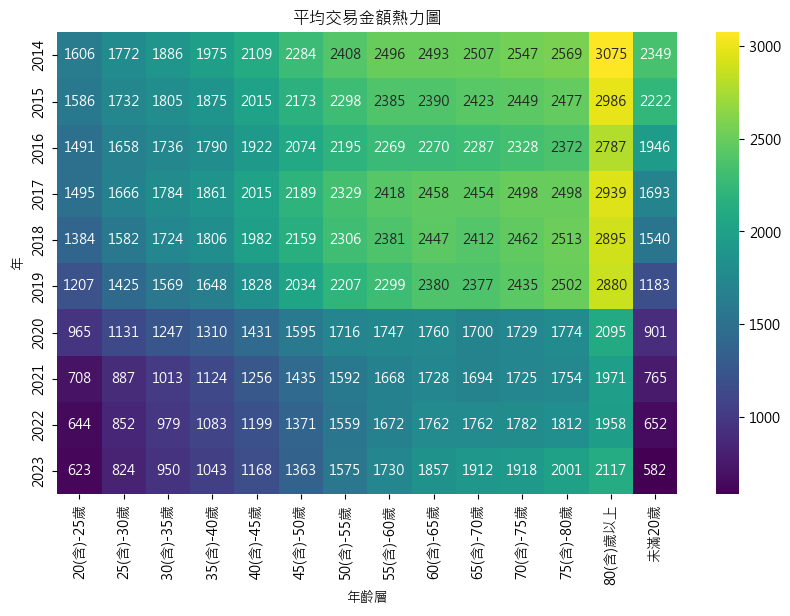

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

# *************************************************************
# #############      分析6都    ##########################

In [3]:
df = pd.read_csv('./age_trans.csv')
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...,...
504499,2023,9,臺南市,其他,男性,60(含)-65歲,5651,27495078
504500,2023,9,臺南市,其他,男性,65(含)-70歲,3589,20028488
504501,2023,9,臺南市,其他,男性,70(含)-75歲,2009,10553100
504502,2023,9,臺南市,其他,男性,75(含)-80歲,602,3561448


In [4]:
matplotlib.rc('font', family='Microsoft JhengHei')
other = df["產業別"] != '其他'
df_a = df[other]

df_a
df_a.to_csv('output.csv', index=False)

In [14]:
# groupby(['年', '年齡層'])>>>須先執行下述  "# ['平均交易金額']為base的分析"
df["地區"]

print(df_a['年齡層'].unique())

grouped_data['平均交易金額'].describe

['未滿20歲' '20(含)-25歲' '25(含)-30歲' '30(含)-35歲' '35(含)-40歲' '40(含)-45歲'
 '45(含)-50歲' '50(含)-55歲' '55(含)-60歲' '60(含)-65歲' '65(含)-70歲' '70(含)-75歲'
 '75(含)-80歲' '80(含)歲以上']


NameError: name 'grouped_data' is not defined

In [5]:
# ['平均交易金額']為base的分析

## 重排'年齡層'
age_order = ['未滿20歲', '20(含)-25歲' ,'25(含)-30歲' ,'30(含)-35歲' ,'35(含)-40歲', '40(含)-45歲',
             '45(含)-50歲' ,'50(含)-55歲' ,'55(含)-60歲', '60(含)-65歲' ,'65(含)-70歲' ,'70(含)-75歲',
             '75(含)-80歲', '80(含)歲以上']


# 將'年齡層' 列的數據類型轉換為 category，並按照定義的顺序重新排序
df_a['年齡層'] = pd.Categorical(df_a['年齡層'], categories=age_order, ordered=True)


#篩選/分析6都
selected_cities = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']
df_a_selected_cities = df_a[df_a['地區'].isin(selected_cities)]

#grouped_data = df_a_selected_cities.groupby(['地區', '年齡層']).agg({'scores': 'sum', 'course': 'sum'}).reset_index()
# filtered_data = grouped_data[grouped_data['地區'].isin(selected_cities)]
print(df_a_selected_cities['地區'].unique())


#6都排序
df_a_selected_cities['地區'] = pd.Categorical(df_a_selected_cities['地區'], categories=selected_cities, ordered=True)

grouped_data = df_a_selected_cities.groupby(['地區', '年齡層']).agg(
    {'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_area = grouped_data.pivot_table(
    index='年齡層', columns='地區', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\259804482.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['年齡層'] = pd.Categorical(df_a['年齡層'], categories=age_order, ordered=True)
C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\259804482.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a_selected_cities['地區'] = pd.Categorical(df_a_selected_cities['地區'], categories=selected_cities, ordered=True)


['高雄市' '臺北市' '新北市' '桃園市' '臺中市' '臺南市']
地區        年齡層   臺北市   新北市   桃園市   臺中市   臺南市   高雄市
0       未滿20歲   705  1162  1201  1207  1103  1239
1   20(含)-25歲   764   618  1398  1401  1227  1387
2   25(含)-30歲   960   799  1705  1763  1576  1725
3   30(含)-35歲  1114   959  1844  1952  1736  1854
4   35(含)-40歲  1223  1106  1919  1998  1788  1873
5   40(含)-45歲  1335  1243  2038  2120  1874  1966
6   45(含)-50歲  1556  1395  2229  2289  1999  2128
7   50(含)-55歲  1763  1514  2389  2418  2125  2240
8   55(含)-60歲  1883  1593  2459  2502  2188  2291
9   60(含)-65歲  2000  1657  2461  2534  2185  2285
10  65(含)-70歲  2059  1620  2365  2384  2069  2132
11  70(含)-75歲  2106  1595  2322  2299  1968  2058
12  75(含)-80歲  2255  1664  2363  2300  2037  2063
13   80(含)歲以上  2597  1880  2764  2670  2410  2581


In [5]:
pivot_table_area.columns
print(grouped_data['年齡層'])


0         未滿20歲
1     20(含)-25歲
2     25(含)-30歲
3     30(含)-35歲
4     35(含)-40歲
        ...    
79    60(含)-65歲
80    65(含)-70歲
81    70(含)-75歲
82    75(含)-80歲
83     80(含)歲以上
Name: 年齡層, Length: 84, dtype: category
Categories (14, object): ['未滿20歲' < '20(含)-25歲' < '25(含)-30歲' < '30(含)-35歲' ... '65(含)-70歲' < '70(含)-75歲' < '75(含)-80歲' < '80(含)歲以上']


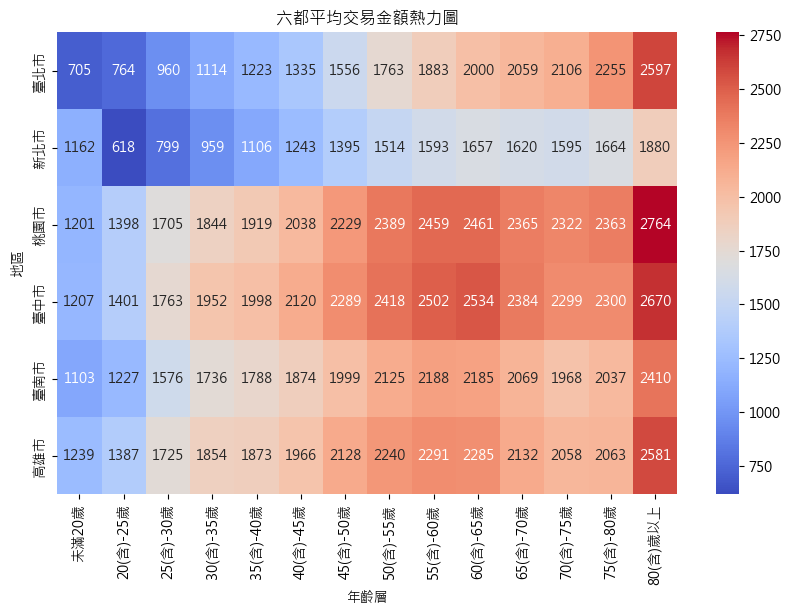

In [6]:
plt.figure(figsize=(10, 6))

#for region, region_data in grouped_data.groupby('地區'):
#    plt.plot(region_data['年齡層'], region_data['平均交易金額'], label=region)


sns.heatmap(pivot_table_area.set_index('年齡層').T,
            cmap='coolwarm', annot=True, fmt=".0f")
plt.title('六都平均交易金額熱力圖')
plt.show()

#盒鬚圖

In [12]:
other = df["產業別"] != '其他'
df_b = df[other]
df_b = df_b.loc[df_b['信用卡交易筆數'] != 0]
df_b['平均交易金額'] = df_b['信用卡交易金額[新台幣]'] / df_b['信用卡交易筆數']
df_b
# 檢視是有空值
#df_b.isnull()

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],平均交易金額
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794,2038.276596
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668,2335.871950
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577,2550.328675
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594,2645.073277
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652,2769.005207
...,...,...,...,...,...,...,...,...,...
504485,2023,9,臺南市,百貨,男性,60(含)-65歲,34523,51136603,1481.232888
504486,2023,9,臺南市,百貨,男性,65(含)-70歲,22840,30749641,1346.306524
504487,2023,9,臺南市,百貨,男性,70(含)-75歲,14364,18817420,1310.040379
504488,2023,9,臺南市,百貨,男性,75(含)-80歲,4800,6001508,1250.314167


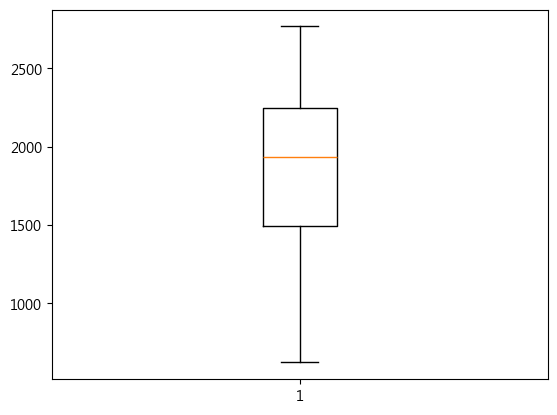

count      84.000000
mean     1842.554997
std       505.181392
min       622.975545
25%      1491.994192
50%      1936.273285
75%      2244.748610
max      2767.204927
Name: 平均交易金額, dtype: float64

In [17]:
import matplotlib.pyplot as plt

x = grouped_data['平均交易金額']
plt.boxplot(x)
plt.show()

grouped_data['平均交易金額'].describe(include='all')




c:\Users\SA3\Documents\GitHub\..__creditcard__\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


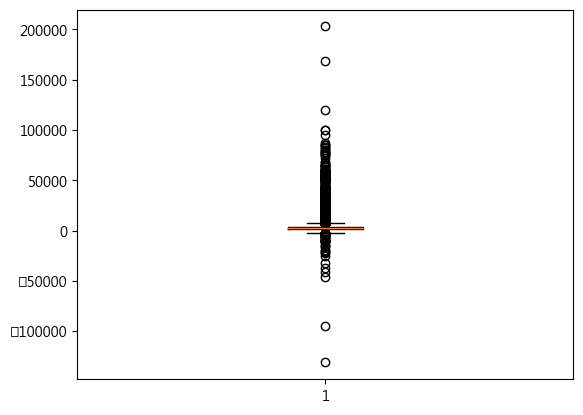

count    425333.000000
mean       2813.905408
std        2703.761842
min     -131114.000000
25%        1157.521720
50%        2079.938776
75%        3629.498899
max      202721.375000
Name: 平均交易金額, dtype: float64

In [13]:

x = df_b['平均交易金額']
plt.boxplot(x)
plt.show()

df_b['平均交易金額'].describe(include='all')

S-4.計算四分位距(IQR) = Q3 – Q1
S-5.計算下邊界(lower) = Q1-1.5*IQR
S-6.計算上邊界(upper) = Q3+1.5*IQR

In [19]:
# 設定區間
#IQR
IQR = np.percentile(df_b['平均交易金額'], 75) - np.percentile(df_b['平均交易金額'], 25)
#lower_bound = 1157.9-1.5*(3633.9-1157.9)
lower_bound = np.percentile(df_b['平均交易金額'], 25) -1.5*IQR

#upper_bound = 3633.9+1.5*(3633.9-1157.9)
upper_bound = np.percentile(df_b['平均交易金額'], 75) +1.5*IQR
print(lower_bound, upper_bound)


-2550.444048717861 7337.464668174082


-2550.5 7337.5
           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]       平均交易金額
0       2014  1  彰化縣   衣  女性      未滿20歲      282        574794  2038.276596
1       2014  1  彰化縣   衣  女性  20(含)-25歲     7091      16563668  2335.871950
2       2014  1  彰化縣   衣  女性  25(含)-30歲    20467      52197577  2550.328675
3       2014  1  彰化縣   衣  女性  30(含)-35歲    35400      93635594  2645.073277
4       2014  1  彰化縣   衣  女性  35(含)-40歲    41102     113811652  2769.005207
...      ... ..  ...  ..  ..        ...      ...           ...          ...
504485  2023  9  臺南市  百貨  男性  60(含)-65歲    34523      51136603  1481.232888
504486  2023  9  臺南市  百貨  男性  65(含)-70歲    22840      30749641  1346.306524
504487  2023  9  臺南市  百貨  男性  70(含)-75歲    14364      18817420  1310.040379
504488  2023  9  臺南市  百貨  男性  75(含)-80歲     4800       6001508  1250.314167
504489  2023  9  臺南市  百貨  男性   80(含)歲以上     2395       2691015  1123.597077

[405201 rows x 9 columns]


c:\Users\SA3\Documents\GitHub\..__creditcard__\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


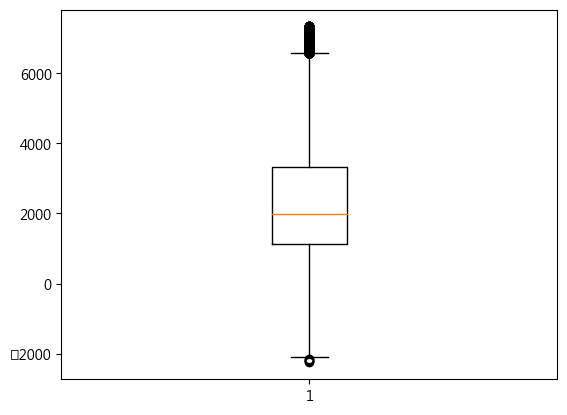

count    405201.000000
mean       2415.237352
std        1599.553106
min       -2252.000000
25%        1129.391079
50%        1981.075314
75%        3313.042857
max        7337.422370
Name: 平均交易金額, dtype: float64

In [20]:
# 設定區間
lower_bound = 1157.5-1.5*(3629.5-1157.5)
upper_bound = 3629.5+1.5*(3629.5-1157.5)
print(lower_bound, upper_bound)

# 使用條件篩選
filtered_df = df_b[(df_b['平均交易金額'] >= lower_bound) &
                 (df_b['平均交易金額'] <= upper_bound)]

# 打印篩選後的 DataFrame
print(filtered_df)

x = filtered_df['平均交易金額']
plt.boxplot(x)
plt.show()

filtered_df['平均交易金額'].describe(include='all')


C:\Users\SA3\AppData\Local\Temp\ipykernel_5220\3185946132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_b['平均交易金額'])
c:\Users\SA3\Documents\GitHub\..__creditcard__\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


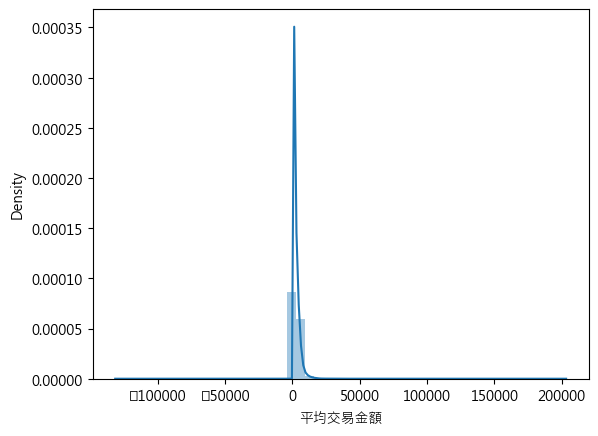

C:\Users\SA3\AppData\Local\Temp\ipykernel_5220\3185946132.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df['平均交易金額'])
c:\Users\SA3\Documents\GitHub\..__creditcard__\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


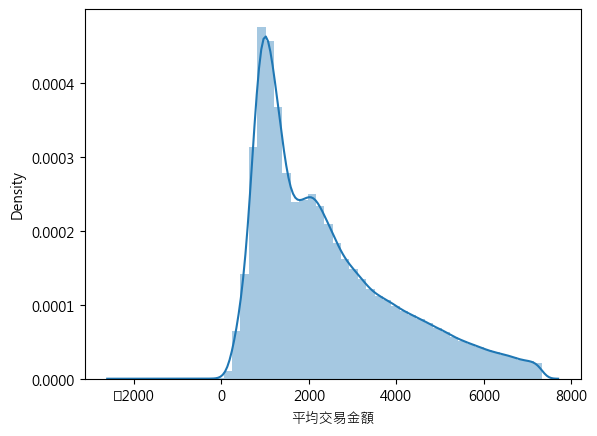

In [22]:
import seaborn as sns
sns.distplot(df_b['平均交易金額'])
plt.show()

sns.distplot(filtered_df['平均交易金額'])
plt.show()


移除離群值
https://andy6804tw.github.io/2021/04/02/python-outliers-clean/

In [ ]:
#參考資料
print ("Shape Of The Before Ouliers: ",data.shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(data['x'],75) - np.percentile(data['x'],25)
#outlier = Q3 + n*IQR 
data=data[data['x'] < np.percentile(data['x'],75)+n*IQR]
#outlier = Q1 - n*IQR 
data=data[data['x'] > np.percentile(data['x'],25)-n*IQR]
print ("Shape Of The After Ouliers: ",data.shape)

# ++++++++++++++++++++++= df_noOther =++++++++++++++
# 選六都的盒鬚圖

In [9]:
df_age = pd.read_csv('./age_trans.csv')
df_age


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...,...
504499,2023,9,臺南市,其他,男性,60(含)-65歲,5651,27495078
504500,2023,9,臺南市,其他,男性,65(含)-70歲,3589,20028488
504501,2023,9,臺南市,其他,男性,70(含)-75歲,2009,10553100
504502,2023,9,臺南市,其他,男性,75(含)-80歲,602,3561448


In [10]:
# test
matplotlib.rc('font', family='Microsoft JhengHei')
other = df_age["產業別"] != '其他'
# df_live = df_age[other]
df_noOther = df_age[other]
df_noOther = df_noOther.loc[df_noOther['信用卡交易筆數'] != 0]
df_noOther['平均交易金額'] = df_noOther['信用卡交易金額[新台幣]'] / df_noOther['信用卡交易筆數']
df_noOther.info()
# 檢視是有空值
# df_b.isnull()
df_noOther

<class 'pandas.core.frame.DataFrame'>
Index: 425333 entries, 0 to 504489
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   年             425333 non-null  int64  
 1   月             425333 non-null  int64  
 2   地區            425333 non-null  object 
 3   產業別           425333 non-null  object 
 4   性別            425333 non-null  object 
 5   年齡層           425333 non-null  object 
 6   信用卡交易筆數       425333 non-null  int64  
 7   信用卡交易金額[新台幣]  425333 non-null  int64  
 8   平均交易金額        425333 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 32.5+ MB


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],平均交易金額
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794,2038.276596
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668,2335.871950
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577,2550.328675
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594,2645.073277
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652,2769.005207
...,...,...,...,...,...,...,...,...,...
504485,2023,9,臺南市,百貨,男性,60(含)-65歲,34523,51136603,1481.232888
504486,2023,9,臺南市,百貨,男性,65(含)-70歲,22840,30749641,1346.306524
504487,2023,9,臺南市,百貨,男性,70(含)-75歲,14364,18817420,1310.040379
504488,2023,9,臺南市,百貨,男性,75(含)-80歲,4800,6001508,1250.314167


In [11]:
# 篩選/分析6都
selected_cities = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']
df_noOther_selected_cities = df_noOther[df_noOther['地區'].isin(selected_cities)]

print(df_noOther_selected_cities)
# df_noOther_selected_cities ['地區'].unique()
df_noOther


           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]       平均交易金額
137592  2014  1  高雄市   衣  女性      未滿20歲      275        483277  1757.370909
137593  2014  1  高雄市   衣  女性  20(含)-25歲     6653      14861538  2233.810011
137594  2014  1  高雄市   衣  女性  25(含)-30歲    15975      37941915  2375.080751
137595  2014  1  高雄市   衣  女性  30(含)-35歲    28644      69910025  2440.651620
137596  2014  1  高雄市   衣  女性  35(含)-40歲    34139      81103642  2375.688860
...      ... ..  ...  ..  ..        ...      ...           ...          ...
504485  2023  9  臺南市  百貨  男性  60(含)-65歲    34523      51136603  1481.232888
504486  2023  9  臺南市  百貨  男性  65(含)-70歲    22840      30749641  1346.306524
504487  2023  9  臺南市  百貨  男性  70(含)-75歲    14364      18817420  1310.040379
504488  2023  9  臺南市  百貨  男性  75(含)-80歲     4800       6001508  1250.314167
504489  2023  9  臺南市  百貨  男性   80(含)歲以上     2395       2691015  1123.597077

[117936 rows x 9 columns]


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],平均交易金額
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794,2038.276596
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668,2335.871950
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577,2550.328675
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594,2645.073277
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652,2769.005207
...,...,...,...,...,...,...,...,...,...
504485,2023,9,臺南市,百貨,男性,60(含)-65歲,34523,51136603,1481.232888
504486,2023,9,臺南市,百貨,男性,65(含)-70歲,22840,30749641,1346.306524
504487,2023,9,臺南市,百貨,男性,70(含)-75歲,14364,18817420,1310.040379
504488,2023,9,臺南市,百貨,男性,75(含)-80歲,4800,6001508,1250.314167


In [19]:
# 設定區間
# IQR
IQR = np.percentile(df_noOther_selected_cities['平均交易金額'], 75) - np.percentile(
    df_noOther_selected_cities['平均交易金額'], 25)
# lower_bound = 1157.9-1.5*(3633.9-1157.9)
lower_bound = np.percentile(df_noOther_selected_cities['平均交易金額'], 25) - 1.5*IQR

# upper_bound = 3633.9+1.5*(3633.9-1157.9)
upper_bound = np.percentile(df_noOther_selected_cities['平均交易金額'], 75) + 1.5*IQR
print(lower_bound, upper_bound)


-2301.5721254815444 7495.924949762803


           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]       平均交易金額
137592  2014  1  高雄市   衣  女性      未滿20歲      275        483277  1757.370909
137593  2014  1  高雄市   衣  女性  20(含)-25歲     6653      14861538  2233.810011
137594  2014  1  高雄市   衣  女性  25(含)-30歲    15975      37941915  2375.080751
137595  2014  1  高雄市   衣  女性  30(含)-35歲    28644      69910025  2440.651620
137596  2014  1  高雄市   衣  女性  35(含)-40歲    34139      81103642  2375.688860
...      ... ..  ...  ..  ..        ...      ...           ...          ...
504485  2023  9  臺南市  百貨  男性  60(含)-65歲    34523      51136603  1481.232888
504486  2023  9  臺南市  百貨  男性  65(含)-70歲    22840      30749641  1346.306524
504487  2023  9  臺南市  百貨  男性  70(含)-75歲    14364      18817420  1310.040379
504488  2023  9  臺南市  百貨  男性  75(含)-80歲     4800       6001508  1250.314167
504489  2023  9  臺南市  百貨  男性   80(含)歲以上     2395       2691015  1123.597077

[113168 rows x 9 columns]


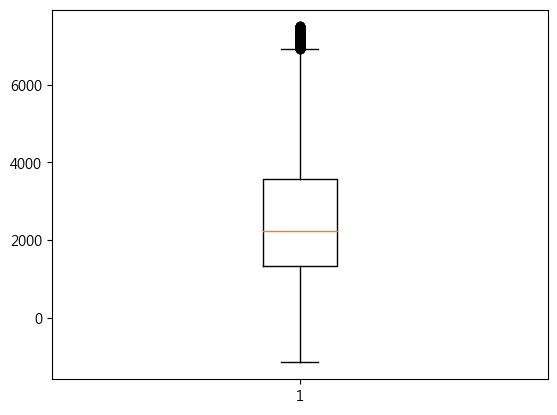

count    113168.000000
mean       2601.019280
std        1546.999903
min       -1149.642857
25%        1342.655157
50%        2239.743065
75%        3576.752983
max        7495.583541
Name: 平均交易金額, dtype: float64

In [20]:
# 使用條件篩選
filtered_df_noOther_6scities = df_noOther_selected_cities[(df_noOther_selected_cities['平均交易金額'] >= lower_bound) &
                                         (df_noOther_selected_cities['平均交易金額'] <= upper_bound)]

# 打印篩選後的 DataFrame
print(filtered_df_noOther_6scities)

x = filtered_df_noOther_6scities['平均交易金額']
plt.boxplot(x)
plt.show()

filtered_df_noOther_6scities['平均交易金額'].describe(include='all')


C:\Users\SA3\AppData\Local\Temp\ipykernel_8852\1998807440.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df_noOther_6scities['平均交易金額'])
c:\Users\SA3\Documents\GitHub\..__creditcard__\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


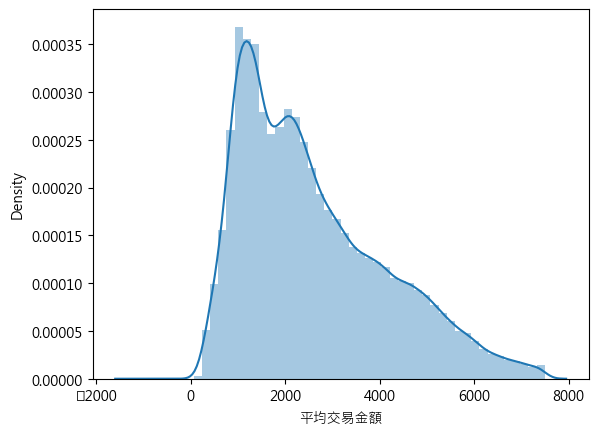

In [21]:
sns.distplot(filtered_df_noOther_6scities['平均交易金額'])
plt.show()


# ================+++  6都筆數分析  +++==================

### 6都_['信用卡交易筆數']為base的分析

In [22]:
# ['信用卡交易筆數']為base的分析

# 重排'年齡層'
age_order = ['未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲',
             '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲',
             '75(含)-80歲', '80(含)歲以上']

# 將'年齡層' 列的數據類型轉換為 category，並按照定義的顺序重新排序
df_a['年齡層'] = pd.Categorical(df_a['年齡層'], categories=age_order, ordered=True)

# 篩選/分析6都
selected_cities = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']
df_a_selected_cities = df_a[df_a['地區'].isin(selected_cities)]

print(df_a_selected_cities)
print(df_a_selected_cities['地區'].unique())

# 6都排序
df_a_selected_cities['地區'] = pd.Categorical(
    df_a_selected_cities['地區'], categories=selected_cities, ordered=True)

grouped_data_6scities = df_a_selected_cities.groupby(['地區', '年齡層']).agg(
    {'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 ['平均交易金額'] --> ['信用卡交易筆數(千)']
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']
grouped_data_6scities['信用卡交易筆數(千)'] = grouped_data_6scities['信用卡交易筆數']/10000

# 重新組織資料，使之符合你的格式
pivot_table_area_quantity = grouped_data_6scities.pivot_table(
    index='年齡層', columns='地區', values='信用卡交易筆數(千)', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area_quantity = pivot_table_area_quantity.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area_quantity.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area_quantity)

C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\2613222726.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['年齡層'] = pd.Categorical(df_a['年齡層'], categories=age_order, ordered=True)


           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
137592  2014  1  高雄市   衣  女性      未滿20歲      275        483277
137593  2014  1  高雄市   衣  女性  20(含)-25歲     6653      14861538
137594  2014  1  高雄市   衣  女性  25(含)-30歲    15975      37941915
137595  2014  1  高雄市   衣  女性  30(含)-35歲    28644      69910025
137596  2014  1  高雄市   衣  女性  35(含)-40歲    34139      81103642
...      ... ..  ...  ..  ..        ...      ...           ...
504485  2023  9  臺南市  百貨  男性  60(含)-65歲    34523      51136603
504486  2023  9  臺南市  百貨  男性  65(含)-70歲    22840      30749641
504487  2023  9  臺南市  百貨  男性  70(含)-75歲    14364      18817420
504488  2023  9  臺南市  百貨  男性  75(含)-80歲     4800       6001508
504489  2023  9  臺南市  百貨  男性   80(含)歲以上     2395       2691015

[117936 rows x 8 columns]
['高雄市' '臺北市' '新北市' '桃園市' '臺中市' '臺南市']
地區        年齡層    臺北市    新北市   桃園市   臺中市   臺南市   高雄市
0       未滿20歲   2248    476   148   202    97   167
1   20(含)-25歲  25994   5648  1862  2863  1349  2155
2   25(含)-30歲  59838  1

C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\2613222726.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a_selected_cities['地區'] = pd.Categorical(


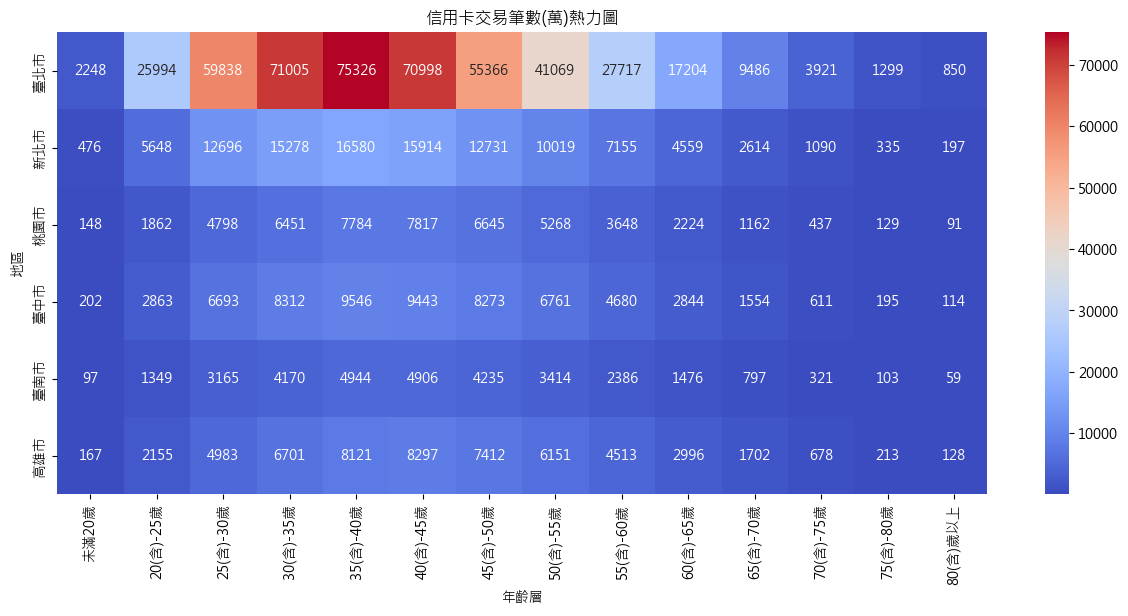

In [19]:
plt.figure(figsize=(15, 6))

sns.heatmap(pivot_table_area_quantity.set_index('年齡層').T,
            cmap='coolwarm', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(萬)熱力圖')
plt.show()

### 6都_['信用卡交易金額[新台幣]'](百萬)為base的分析

In [23]:
# ['信用卡交易金額[新台幣]'](百萬)為base的分析

# 重排'年齡層'
age_order = ['未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲',
             '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲',
             '75(含)-80歲', '80(含)歲以上']

# 將'年齡層' 列的數據類型轉換為 category，並按照定義的顺序重新排序
df_a['年齡層'] = pd.Categorical(df_a['年齡層'], categories=age_order, ordered=True)

# 篩選/分析6都
selected_cities = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']
df_a_selected_cities = df_a[df_a['地區'].isin(selected_cities)]

print(df_a_selected_cities['地區'].unique())

# 6都排序
df_a_selected_cities['地區'] = pd.Categorical(
    df_a_selected_cities['地區'], categories=selected_cities, ordered=True)

grouped_data_6scities = df_a_selected_cities.groupby(['地區', '年齡層']).agg(
    {'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 ['平均交易金額'] --> ['信用卡交易筆數(千)']
# grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']
grouped_data_6scities['信用卡交易金額(百萬)'] = grouped_data_6scities['信用卡交易金額[新台幣]']/1000000

# 重新組織資料，使之符合你的格式
pivot_table_area_amount = grouped_data_6scities.pivot_table(
    index='年齡層', columns='地區', values='信用卡交易金額(百萬)', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area_amount = pivot_table_area_amount.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area_amount.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area_amount)

C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\4156262113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['年齡層'] = pd.Categorical(df_a['年齡層'], categories=age_order, ordered=True)
C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\4156262113.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a_selected_cities['地區'] = pd.Categorical(


['高雄市' '臺北市' '新北市' '桃園市' '臺中市' '臺南市']
地區        年齡層     臺北市     新北市     桃園市     臺中市    臺南市     高雄市
0       未滿20歲   15848    5525    1784    2442   1072    2067
1   20(含)-25歲  198511   34898   26031   40115  16546   29881
2   25(含)-30歲  574705  101396   81788  118028  49874   85942
3   30(含)-35歲  790774  146574  118955  162230  72376  124254
4   35(含)-40歲  921365  183412  149340  190713  88391  152079
5   40(含)-45歲  947487  197852  159295  200179  91917  163097
6   45(含)-50歲  861654  177563  148117  189380  84643  157730
7   50(含)-55歲  724101  151691  125855  163499  72528  137794
8   55(含)-60歲  521791  113987   89700  117112  52218  103409
9   60(含)-65歲  344173   75539   54732   72075  32244   68468
10  65(含)-70歲  195278   42351   27484   37040  16489   36295
11  70(含)-75歲   82586   17393   10157   14061   6323   13957
12  75(含)-80歲   29288    5579    3050    4495   2092    4389
13   80(含)歲以上   22062    3710    2507    3037   1427    3313


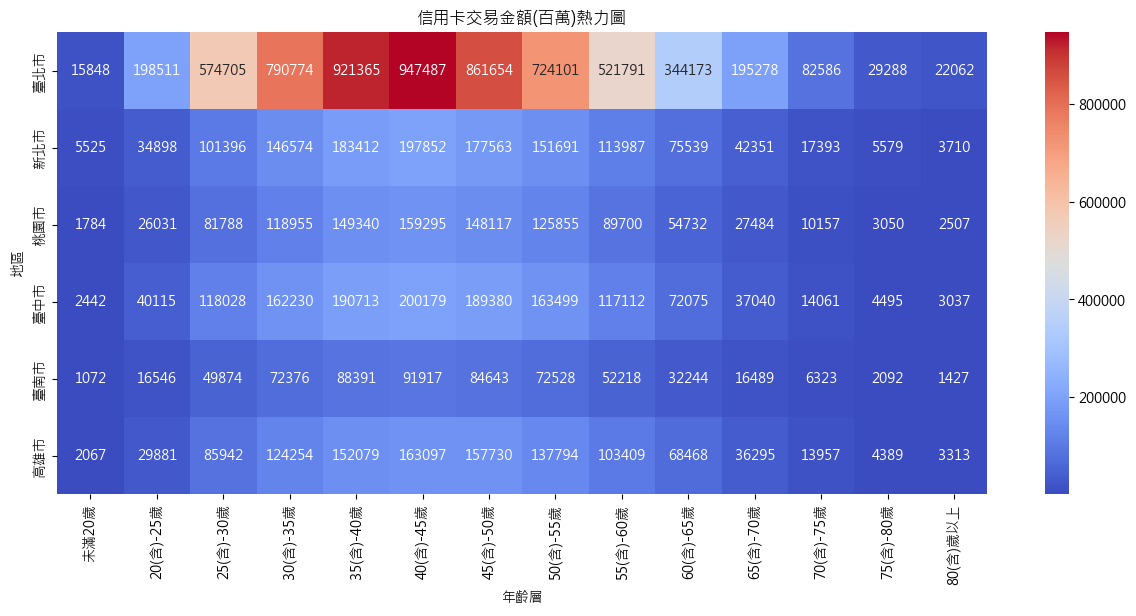

In [21]:
plt.figure(figsize=(15, 6))

sns.heatmap(pivot_table_area_amount.set_index('年齡層').T,
            cmap='coolwarm', annot=True, fmt=".0f")
plt.title('信用卡交易金額(百萬)熱力圖')
plt.show()

### 台北市_'年齡層'_['信用卡交易金額[新台幣]'](百萬)為base的分析

In [7]:
print(df_a['產業別'].unique())

['衣' '百貨' '文教康樂' '食' '住' '行']


In [25]:
# 台北市['信用卡交易金額[新台幣]'](百萬)為base的分析

# 重排'年齡層'
age_order = ['未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲',
             '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲',
             '75(含)-80歲', '80(含)歲以上']

# 將'年齡層' 列的數據類型轉換為 category，並按照定義的顺序重新排序
df_a['年齡層'] = pd.Categorical(df_a['年齡層'], categories=age_order, ordered=True)

# 篩選/分析6都
#selected_cities = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']
#df_a_selected_cities = df_a[df_a['地區'].isin(selected_cities)]
#print(df_a_selected_cities['地區'].unique())

# 篩選/分析[臺北市]
selected_taipei = ['臺北市']
df_a_taipei = df_a[df_a['地區'].isin(selected_taipei)]
print(df_a_taipei['地區'].unique())


# 篩選['產業別']
selected_items = ['食', '衣', '住', '行', '百貨', '文教康樂']
df_a_selected_items = df_a_taipei[df_a_taipei['產業別'].isin(selected_items)]
print(df_a_selected_items['產業別'].unique())


# ['產業別']排序
df_a_selected_items['產業別'] = pd.Categorical(
    df_a_selected_items['產業別'], categories=selected_items, ordered=True)

grouped_data_taipei = df_a_selected_items.groupby(['地區', '產業別', '年齡層']).agg(
    {'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 ['平均交易金額'] --> ['信用卡交易筆數(千)']
# grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']
grouped_data_taipei['信用卡交易金額(百萬)'] = grouped_data_taipei['信用卡交易金額[新台幣]']/1000000

# 重新組織資料，使之符合你的格式
pivot_table_area_taipei = grouped_data_taipei.pivot_table(
    index='年齡層', columns='產業別', values='信用卡交易金額(百萬)', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area_taipei = pivot_table_area_taipei.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area_taipei.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area_taipei)


['臺北市']
['食' '衣' '住' '行' '文教康樂' '百貨']
產業別        年齡層       食      衣      住       行      百貨    文教康樂
0        未滿20歲    2701   1002   1321    2716    2883    5225
1    20(含)-25歲   36180  13906  11902   30680   46081   59762
2    25(含)-30歲  103844  37886  39979   81120  155285  156590
3    30(含)-35歲  141504  49778  62135  110538  227456  199363
4    35(含)-40歲  166820  51330  70606  128368  275326  228917
5    40(含)-45歲  170038  43072  68100  131820  278533  255924
6    45(含)-50歲  149793  34768  59069  121417  239134  257473
7    50(含)-55歲  123656  28859  51328  105678  197496  217083
8    55(含)-60歲   93159  21822  41269   80512  141161  143868
9    60(含)-65歲   65319  14443  29758   52422   90241   91989
10   65(含)-70歲   39360   7776  17222   25942   52195   52784
11   70(含)-75歲   17774   3204   7016    9333   23589   21669
12   75(含)-80歲    7036   1050   2744    2661    7846    7951
13    80(含)歲以上    5173   1114   2171    1675    5259    6670


C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\1130512446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['年齡層'] = pd.Categorical(df_a['年齡層'], categories=age_order, ordered=True)


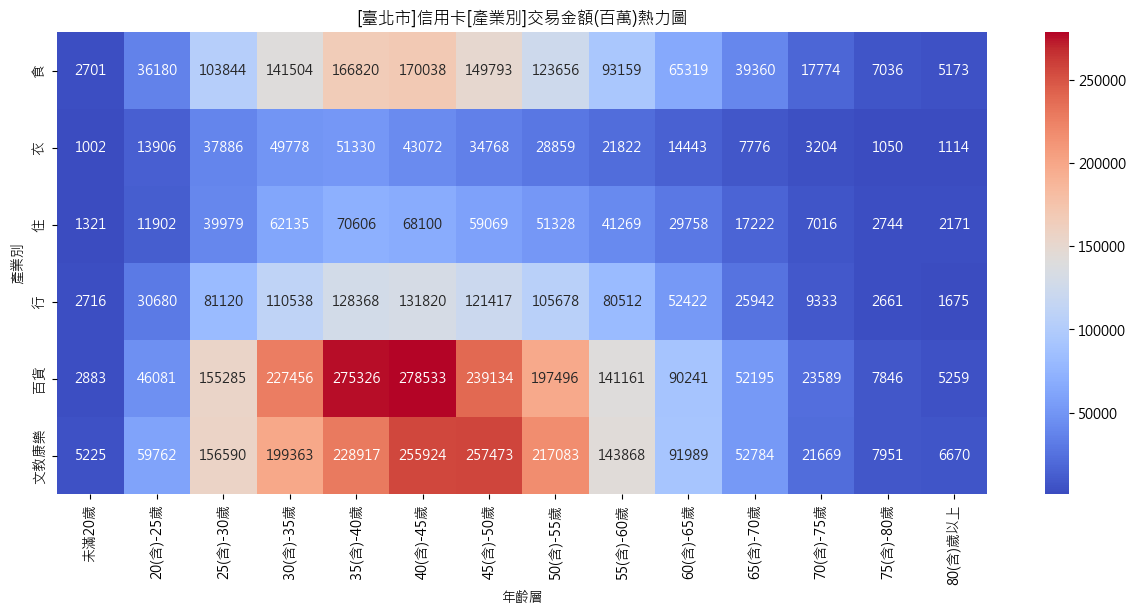

In [26]:
plt.figure(figsize=(15, 6))

sns.heatmap(pivot_table_area_taipei.set_index('年齡層').T,
            cmap='coolwarm', annot=True, fmt=".0f")
plt.title('[臺北市]信用卡[產業別]交易金額(百萬)熱力圖')
plt.show()

In [29]:
print(grouped_data_6scities['信用卡交易金額(百萬)'] )
print(grouped_data_6scities['信用卡交易金額[新台幣]'])


0      15847.742170
1     198510.904089
2     574705.082337
3     790773.895180
4     921365.496644
          ...      
79     68468.079917
80     36294.868023
81     13957.226477
82      4388.742566
83      3313.217966
Name: 信用卡交易金額(百萬), Length: 84, dtype: float64
0      15847742170
1     198510904089
2     574705082337
3     790773895180
4     921365496644
          ...     
79     68468079917
80     36294868023
81     13957226477
82      4388742566
83      3313217966
Name: 信用卡交易金額[新台幣], Length: 84, dtype: int64


#### (tmp) 台北市'年'消費['信用卡交易金額[新台幣]'](百萬)為base的分析

In [ ]:
# 台北市['信用卡交易金額[新台幣]'](百萬)為base的分析

# 重排'年齡層'
age_order = ['未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲',
             '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲',
             '75(含)-80歲', '80(含)歲以上']

# 將'年齡層' 列的數據類型轉換為 category，並按照定義的顺序重新排序
df_a['年齡層'] = pd.Categorical(df_a['年齡層'], categories=age_order, ordered=True)

# 篩選/分析6都
# selected_cities = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']
# df_a_selected_cities = df_a[df_a['地區'].isin(selected_cities)]
# print(df_a_selected_cities['地區'].unique())

# 篩選/分析[臺北市]
selected_cities = ['臺北市']
df_a_taipei = df_a[df_a['地區'].isin(selected_cities)]
print(df_a_taipei['地區'].unique())


# 篩選['產業別']
selected_items = ['食', '衣', '住', '行', '百貨', '文教康樂']
df_a_selected_items = df_a[df_a['產業別'].isin(selected_items)]
print(df_a_selected_items['產業別'].unique())


# 6都排序
df_a_selected_items['產業別'] = pd.Categorical(
    df_a_selected_items['產業別'], categories=selected_items, ordered=True)

grouped_data = df_a_selected_items.groupby(['產業別', '年齡層']).agg(
    {'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 ['平均交易金額'] --> ['信用卡交易筆數(千)']
# grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']
grouped_data['信用卡交易金額(百萬)'] = grouped_data['信用卡交易金額[新台幣]']/1000000

# 重新組織資料，使之符合你的格式
pivot_table_area = grouped_data.pivot_table(
    index='年齡層', columns='產業別', values='信用卡交易金額(百萬)', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

## 全台_趨勢線 & R平值

In [ ]:
import numpy as np
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt

# 創建一個範例 DataFrame
#data = {'x': [1, 2, 3, 4, 5],
#        'y': [2, 4, 5, 4, 5]}
#df = pd.DataFrame(data)
##df_consume = pd.df_b['信用卡交易金額[新台幣]']
#df_consume = df_a.groupby(['年', '月'])['信用卡交易金額[新台幣]'].agg({'信用卡交易金額[新台幣]': 'sum'}).reset_index()
#df_consume = df_a.groupby(['年', '月'])['信用卡交易金額[新台幣]'].agg('信用卡交易金額[新台幣]'='sum').reset_index()
df_consume = df_a.groupby(['年', '月']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()
df_consume['信用卡交易金額[百萬]'] = df_consume['信用卡交易金額[新台幣]']/1000000
#df_consume['年月'] = df_consume[str(df_consume['年'])+str( df_consume['月'])]
#df_consume['日期'] = df_consume.to_datetime(df[['年', '月']].assign(DAY=1))
print(df_consume['年'])

# 提取 x 和 y 的數據
x = df_consume['年']
y = df_consume['信用卡交易金額[新台幣]']

# 計算線性趨勢線
slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(x)), y)

# 計算預測值
y_pred = intercept + slope * np.arange(len(x))

# 計算 R 平方值
r_squared = r_value**2

# 打印線性趨勢線的方程式和 R 平方值
print(f'線性趨勢線方程式: y = {slope:.2f}x + {intercept:.2f}')
print(f'R 平方值: {r_squared:.2f}')

# 繪製原始數據和線性趨勢線
plt.scatter(x, y, label='原始數據')
plt.plot(x, y_pred, color='red', label='線性趨勢線')
plt.xlabel('日期')
plt.ylabel('人數')
plt.legend()
plt.show()


In [6]:
#test ok
df_age = pd.read_csv('./age.csv')
df_age

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,201401,10007000,衣,2,未滿20歲,282,574794
1,201401,10007000,衣,2,20(含)-25歲,7091,16563668
2,201401,10007000,衣,2,25(含)-30歲,20467,52197577
3,201401,10007000,衣,2,30(含)-35歲,35400,93635594
4,201401,10007000,衣,2,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...
500187,202308,67000000,其他,1,60(含)-65歲,5961,29661357
500188,202308,67000000,其他,1,65(含)-70歲,3808,21203594
500189,202308,67000000,其他,1,70(含)-75歲,2213,12924404
500190,202308,67000000,其他,1,75(含)-80歲,680,4171218


In [15]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504504 entries, 0 to 504503
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            504504 non-null  int64 
 1   地區            504504 non-null  int64 
 2   產業別           504504 non-null  object
 3   性別            504504 non-null  int64 
 4   年齡層           504504 non-null  object
 5   信用卡交易筆數       504504 non-null  int64 
 6   信用卡交易金額[新台幣]  504504 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.9+ MB


In [17]:
df_age.describe


<bound method NDFrame.describe of             年月        地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       201401  10007000   衣   2      未滿20歲      282        574794
1       201401  10007000   衣   2  20(含)-25歲     7091      16563668
2       201401  10007000   衣   2  25(含)-30歲    20467      52197577
3       201401  10007000   衣   2  30(含)-35歲    35400      93635594
4       201401  10007000   衣   2  35(含)-40歲    41102     113811652
...        ...       ...  ..  ..        ...      ...           ...
504499  202309  67000000  其他   1  60(含)-65歲     5651      27495078
504500  202309  67000000  其他   1  65(含)-70歲     3589      20028488
504501  202309  67000000  其他   1  70(含)-75歲     2009      10553100
504502  202309  67000000  其他   1  75(含)-80歲      602       3561448
504503  202309  67000000  其他   1   80(含)歲以上      369       2306471

[504504 rows x 7 columns]>

In [7]:
#test
other = df_age["產業別"] != '其他'
#df_live = df_age[other]
df_noOther = df_age[other]
df_noOther = df_noOther.loc[df_noOther['信用卡交易筆數'] != 0]
df_noOther['平均交易金額'] = df_noOther['信用卡交易金額[新台幣]'] / df_noOther['信用卡交易筆數']
df_noOther.info()
# 檢視是有空值
# df_b.isnull()

<class 'pandas.core.frame.DataFrame'>
Index: 421675 entries, 0 to 500177
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   年月            421675 non-null  int64  
 1   地區            421675 non-null  int64  
 2   產業別           421675 non-null  object 
 3   性別            421675 non-null  int64  
 4   年齡層           421675 non-null  object 
 5   信用卡交易筆數       421675 non-null  int64  
 6   信用卡交易金額[新台幣]  421675 non-null  int64  
 7   平均交易金額        421675 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 29.0+ MB


In [19]:
df_noOther.describe



<bound method NDFrame.describe of             年月        地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]  \
0       201401  10007000   衣   2      未滿20歲      282        574794   
1       201401  10007000   衣   2  20(含)-25歲     7091      16563668   
2       201401  10007000   衣   2  25(含)-30歲    20467      52197577   
3       201401  10007000   衣   2  30(含)-35歲    35400      93635594   
4       201401  10007000   衣   2  35(含)-40歲    41102     113811652   
...        ...       ...  ..  ..        ...      ...           ...   
504485  202309  67000000  百貨   1  60(含)-65歲    34523      51136603   
504486  202309  67000000  百貨   1  65(含)-70歲    22840      30749641   
504487  202309  67000000  百貨   1  70(含)-75歲    14364      18817420   
504488  202309  67000000  百貨   1  75(含)-80歲     4800       6001508   
504489  202309  67000000  百貨   1   80(含)歲以上     2395       2691015   

             平均交易金額  
0       2038.276596  
1       2335.871950  
2       2550.328675  
3       2645.073277  
4       2769.00

In [8]:
#test
df_grouped = df_noOther.groupby(['年月']).agg(
    {'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()
#df = pd.DataFrame(grouped_data)
#df
df_grouped.info()
print(type(df_grouped))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   年月            116 non-null    int64
 1   信用卡交易金額[新台幣]  116 non-null    int64
 2   信用卡交易筆數       116 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>


In [9]:
df_grouped


,年月,信用卡交易金額[新台幣],信用卡交易筆數
0,201401,96782145974,42102289
1,201402,78141463051,35664726
2,201403,79666830097,39105050
3,201404,82174472870,38297969
4,201405,87883930454,41053835
...,...,...,...
111,202304,180453426361,153218273
112,202305,186102471236,160901659
113,202306,179497742421,160103832
114,202307,189295032841,170693488


In [66]:
df_grouped


,年月,信用卡交易金額[新台幣],信用卡交易筆數,信用卡交易金額[百萬],信用卡交易金額[億元]
0,2014-01-01,96782145974,42102289,96782.145974,967.821460
1,2014-02-01,78141463051,35664726,78141.463051,781.414631
2,2014-03-01,79666830097,39105050,79666.830097,796.668301
3,2014-04-01,82174472870,38297969,82174.472870,821.744729
4,2014-05-01,87883930454,41053835,87883.930454,878.839305
...,...,...,...,...,...
112,2023-05-01,186102471236,160901659,186102.471236,1861.024712
113,2023-06-01,179497742421,160103832,179497.742421,1794.977424
114,2023-07-01,189295032841,170693488,189295.032841,1892.950328
115,2023-08-01,198057997676,171419368,198057.997676,1980.579977


<Figure size 1200x600 with 0 Axes>

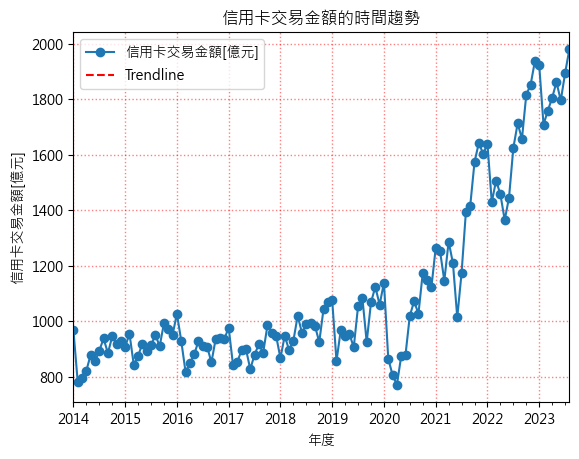

In [51]:
#test ok
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(12, 6))
# 创建一个数据帧
# df = pd.DataFrame({'x': [1, 3, 3, 4], 'y': [3, 4, 5, 6]})

# 將 '日期' 列轉換為 Pandas 的日期時間對象
df_grouped['年月'] = pd.to_datetime(df_grouped['年月'], format='%Y%m')
df_grouped['信用卡交易金額[億元]'] = df_grouped['信用卡交易金額[新台幣]']/100000000

# 绘制散点图
#df_grouped.plot(kind='scatter', x='年月', y='信用卡交易金額[新台幣]')
df_grouped.plot(x='年月', y='信用卡交易金額[億元]', marker='o')
#plt.plot(df_grouped.index,df_grouped['信用卡交易金額[億元]'],  'b-',  marker='$o$', label='交易金額[億]')

plt.show()

# 计算多项式拟合的系数
#z = np.polyfit(df.index, df['數值'], 1)
z = np.polyfit(df_grouped.index, df_grouped['信用卡交易金額[億元]'], 2)

# 求出该拟合曲线
p = np.poly1d(z)

# 绘制散点图和趋势线
plt.plot(df_grouped.index, p(df_grouped.index), 'r--', label='Trendline')


# Customize x-axis and y-axis
plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年度')
plt.ylabel('信用卡交易金額[億元]')

plt.legend()  # Show legend with the trendline
plt.grid(color='red', linestyle=':', linewidth=1, alpha=0.5)  # 設定格線







plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


線性趨勢線方程式: y = 672.85 + 7.66 * x
R 平方值: 0.64


<Figure size 1200x600 with 0 Axes>

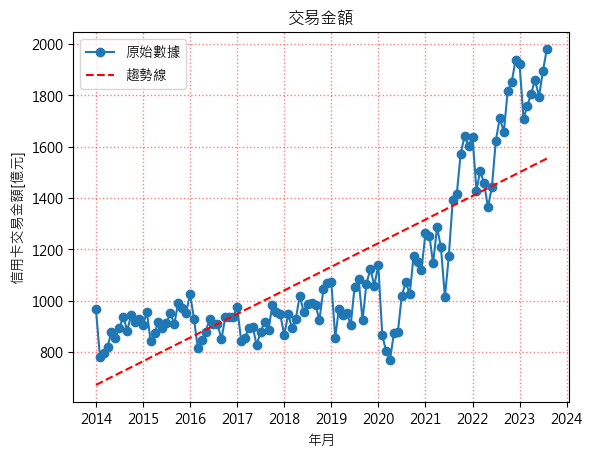

In [33]:
#chatGPT chk ok
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress


plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(12, 6))
# 假設 df_grouped 是您的 DataFrame

# 將 '年' 列轉換為 datetime
df_grouped['年月'] = pd.to_datetime(df_grouped['年月'], format='%Y%m')
df_grouped['信用卡交易金額[億元]'] = df_grouped['信用卡交易金額[新台幣]']/100000000

# 創建一個 Figure 和 Axes
fig, ax = plt.subplots()


plt.legend()  # Show legend with the trendline
plt.grid(color='red', linestyle=':', linewidth=1, alpha=0.5)  # 設定格線

# 繪製原始數據
ax.plot(df_grouped['年月'], df_grouped['信用卡交易金額[億元]'],marker='o', label='交易金額[億元]')

# 進行多項式擬合
z = np.polyfit(df_grouped.index, df_grouped['信用卡交易金額[億元]'], 1)
p = np.poly1d(z)

# 繪製趨勢線
ax.plot(df_grouped['年月'], p(df_grouped.index), 'r--', label='趨勢線')

# 設定標籤和標題
ax.set_title('交易金額')
ax.set_xlabel('年月')
ax.set_ylabel('信用卡交易金額[億元]')

# 顯示圖例
ax.legend()

# 顯示圖表
#plt.show()

#############################################
## 使用 linregress 進行線性回歸
x= df_grouped['年月']
y= df_grouped['信用卡交易金額[億元]']

slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(x)), y)

## 計算預測值
y_pred = intercept + slope * np.arange(len(x))

## 計算 R 平方值
r_squared = r_value**2
plt.legend()  # Show legend with the trendline
plt.grid(color='red', linestyle=':', linewidth=1, alpha=0.5)  # 設定格線

# 打印線性趨勢線的方程式和 R 平方值
print(f'線性趨勢線方程式: y = {intercept:.2f} + {slope:.2f} * x')
print(f'R 平方值: {r_squared:.2f}')

plt.show()

In [ ]:
## 6都_趨勢線 & R平值

In [102]:
df_age = pd.read_csv('./age.csv')
#df_age_dropAreaCode = df_age.drop(["地區"], axis=1)
df_age_trans = pd.read_csv('./age_trans.csv')
#df_age_trans = df_age_trans['地區']

#df_age_merge = pd.merge(df_age_dropAreaCode, df_age_trans,left_index=True, right_index=True)
df_age_merge = pd.merge(df_age_trans, df_age['年月'], left_index=True, right_index=True)
df_age_merge


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],年月
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794,201401
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668,201401
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577,201401
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594,201401
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652,201401
...,...,...,...,...,...,...,...,...,...
504499,2023,9,臺南市,其他,男性,60(含)-65歲,5651,27495078,202309
504500,2023,9,臺南市,其他,男性,65(含)-70歲,3589,20028488,202309
504501,2023,9,臺南市,其他,男性,70(含)-75歲,2009,10553100,202309
504502,2023,9,臺南市,其他,男性,75(含)-80歲,602,3561448,202309


In [103]:
matplotlib.rc('font', family='Microsoft JhengHei')
noOther = df_age_merge["產業別"] != '其他'

df_noOther = df_age_merge[noOther]
df_noOther = df_noOther.loc[df_noOther['信用卡交易筆數'] != 0]
df_noOther['平均交易金額'] = df_noOther['信用卡交易金額[新台幣]'] / df_noOther['信用卡交易筆數']
#df_noOther.info()
# 檢視是有空值
# df_b.isnull()
df_noOther


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],年月,平均交易金額
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794,201401,2038.276596
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668,201401,2335.871950
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577,201401,2550.328675
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594,201401,2645.073277
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652,201401,2769.005207
...,...,...,...,...,...,...,...,...,...,...
504485,2023,9,臺南市,百貨,男性,60(含)-65歲,34523,51136603,202309,1481.232888
504486,2023,9,臺南市,百貨,男性,65(含)-70歲,22840,30749641,202309,1346.306524
504487,2023,9,臺南市,百貨,男性,70(含)-75歲,14364,18817420,202309,1310.040379
504488,2023,9,臺南市,百貨,男性,75(含)-80歲,4800,6001508,202309,1250.314167


In [104]:
# 篩選/分析6都
selected_6cities = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']
df_noOther_6cities = df_noOther[df_noOther['地區'].isin(selected_6cities)]

print(df_noOther_6cities)
# df_noOther_selected_cities ['地區'].unique()
df_noOther_6cities.head(10)


           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]      年月  \
137592  2014  1  高雄市   衣  女性      未滿20歲      275        483277  201401   
137593  2014  1  高雄市   衣  女性  20(含)-25歲     6653      14861538  201401   
137594  2014  1  高雄市   衣  女性  25(含)-30歲    15975      37941915  201401   
137595  2014  1  高雄市   衣  女性  30(含)-35歲    28644      69910025  201401   
137596  2014  1  高雄市   衣  女性  35(含)-40歲    34139      81103642  201401   
...      ... ..  ...  ..  ..        ...      ...           ...     ...   
504485  2023  9  臺南市  百貨  男性  60(含)-65歲    34523      51136603  202309   
504486  2023  9  臺南市  百貨  男性  65(含)-70歲    22840      30749641  202309   
504487  2023  9  臺南市  百貨  男性  70(含)-75歲    14364      18817420  202309   
504488  2023  9  臺南市  百貨  男性  75(含)-80歲     4800       6001508  202309   
504489  2023  9  臺南市  百貨  男性   80(含)歲以上     2395       2691015  202309   

             平均交易金額  
137592  1757.370909  
137593  2233.810011  
137594  2375.080751  
137595  2440.651620  
1

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],年月,平均交易金額
137592,2014,1,高雄市,衣,女性,未滿20歲,275,483277,201401,1757.370909
137593,2014,1,高雄市,衣,女性,20(含)-25歲,6653,14861538,201401,2233.810011
137594,2014,1,高雄市,衣,女性,25(含)-30歲,15975,37941915,201401,2375.080751
137595,2014,1,高雄市,衣,女性,30(含)-35歲,28644,69910025,201401,2440.651620
137596,2014,1,高雄市,衣,女性,35(含)-40歲,34139,81103642,201401,2375.688860
137597,2014,1,高雄市,衣,女性,40(含)-45歲,31779,80609009,201401,2536.549577
137598,2014,1,高雄市,衣,女性,45(含)-50歲,25118,73425248,201401,2923.212358
137599,2014,1,高雄市,衣,女性,50(含)-55歲,14910,50984603,201401,3419.490476
137600,2014,1,高雄市,衣,女性,55(含)-60歲,8056,30369740,201401,3769.828699
137601,2014,1,高雄市,衣,女性,60(含)-65歲,3570,12328527,201401,3453.368908


In [105]:
df_grouped_6cities = df_noOther_6cities.groupby(['年月']).agg(
    {'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()
# df = pd.DataFrame(grouped_data)
# df
df_grouped_6cities.info()
print(type(df_grouped_6cities))
df_grouped_6cities


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   年月            117 non-null    int64
 1   信用卡交易金額[新台幣]  117 non-null    int64
 2   信用卡交易筆數       117 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB
<class 'pandas.core.frame.DataFrame'>


,年月,信用卡交易金額[新台幣],信用卡交易筆數
0,201401,76800411337,32154251
1,201402,62505801850,27209094
2,201403,63526607164,29986574
3,201404,65788821735,29478606
4,201405,70200355390,31625276
...,...,...,...
112,202305,168882656190,150123141
113,202306,162415021002,149092364
114,202307,170739795168,158855792
115,202308,179663600973,159647086


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


線性趨勢線方程式: y = 524.88 + 7.85 * x
R 平方值: 0.71


<Figure size 1200x600 with 0 Axes>

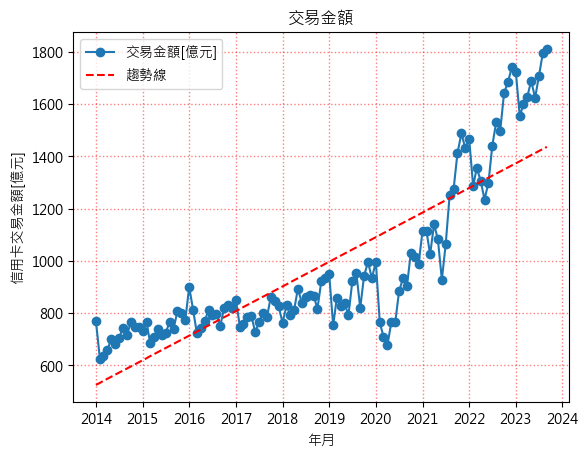

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress


plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(12, 6))
# 假設 df_grouped 是您的 DataFrame

# 將 '年' 列轉換為 datetime
df_grouped_6cities['年月'] = pd.to_datetime(df_grouped_6cities['年月'], format='%Y%m')
df_grouped_6cities['信用卡交易金額[億元]'] = df_grouped_6cities['信用卡交易金額[新台幣]']/100000000

# 創建一個 Figure 和 Axes
fig, ax = plt.subplots()


plt.legend()  # Show legend with the trendline
plt.grid(color='red', linestyle=':', linewidth=1, alpha=0.5)  # 設定格線

# 繪製原始數據
ax.plot(df_grouped_6cities['年月'],df_grouped_6cities['信用卡交易金額[億元]'], marker='o', label='交易金額[億元]')

# 進行多項式擬合
z = np.polyfit(df_grouped_6cities.index, df_grouped_6cities['信用卡交易金額[億元]'], 1)
p = np.poly1d(z)

# 繪製趨勢線
ax.plot(df_grouped_6cities['年月'], p(
    df_grouped_6cities.index), 'r--', label='趨勢線')

# 設定標籤和標題
ax.set_title('交易金額')
ax.set_xlabel('年月')
ax.set_ylabel('信用卡交易金額[億元]')

# 顯示圖例
ax.legend()

# 顯示圖表
#plt.show()

#############################################
## 使用 linregress 進行線性回歸
x = df_grouped_6cities['年月']
y = df_grouped_6cities['信用卡交易金額[億元]']

slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(x)), y)

## 計算預測值
y_pred = intercept + slope * np.arange(len(x))

## 計算 R 平方值
r_squared = r_value**2
plt.legend()  # Show legend with the trendline
plt.grid(color='red', linestyle=':', linewidth=1, alpha=0.5)  # 設定格線

# 打印線性趨勢線的方程式和 R 平方值
print(f'線性趨勢線方程式: y = {intercept:.2f} + {slope:.2f} * x')
print(f'R 平方值: {r_squared:.2f}')

plt.show()

## -----  試運算 -------

In [ ]:
# reference
import numpy as np

# 计算多项式拟合的系数
z = np.polyfit(df['x'], df['y'], 1)

# 求出该拟合曲线
p = np.poly1d(z)

# 绘制散点图和趋势线
df.plot(kind='scatter', x='x', y='y')
plt.plot(df['x'], p(df['x']), 'r')
plt.show()

In [ ]:
#test
plt.figure(figsize=(12, 6))
df_fig = df_a.groupby(['年', '月'])['信用卡交易金額[新台幣]'].sum().plot(marker='o')
df_fig

plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年月')
plt.ylabel('信用卡交易金額')
plt.show()


# df_b['信用卡交易金額[新台幣]']

## 6都_特徵值 -----標準化與轉換

In [107]:
df_noOther_6cities.info()
df_noOther_6cities.columns


<class 'pandas.core.frame.DataFrame'>
Index: 117936 entries, 137592 to 504489
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   年             117936 non-null  int64  
 1   月             117936 non-null  int64  
 2   地區            117936 non-null  object 
 3   產業別           117936 non-null  object 
 4   性別            117936 non-null  object 
 5   年齡層           117936 non-null  object 
 6   信用卡交易筆數       117936 non-null  int64  
 7   信用卡交易金額[新台幣]  117936 non-null  int64  
 8   年月            117936 non-null  int64  
 9   平均交易金額        117936 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 9.9+ MB


Index(['年', '月', '地區', '產業別', '性別', '年齡層', '信用卡交易筆數', '信用卡交易金額[新台幣]', '年月',
       '平均交易金額'],
      dtype='object')

In [ ]:
#! pip install scikit-learn


### 目標值 = 平均交易金額*1.07

In [108]:
df_noOther_6cities['交易金額(目標)'] = df_noOther_6cities['平均交易金額']*1.05
df_noOther_6cities


C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\39330691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noOther_6cities['交易金額(目標)'] = df_noOther_6cities['平均交易金額']*1.05


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],年月,平均交易金額,交易金額(目標)
137592,2014,1,高雄市,衣,女性,未滿20歲,275,483277,201401,1757.370909,1845.239455
137593,2014,1,高雄市,衣,女性,20(含)-25歲,6653,14861538,201401,2233.810011,2345.500511
137594,2014,1,高雄市,衣,女性,25(含)-30歲,15975,37941915,201401,2375.080751,2493.834789
137595,2014,1,高雄市,衣,女性,30(含)-35歲,28644,69910025,201401,2440.651620,2562.684201
137596,2014,1,高雄市,衣,女性,35(含)-40歲,34139,81103642,201401,2375.688860,2494.473303
...,...,...,...,...,...,...,...,...,...,...,...
504485,2023,9,臺南市,百貨,男性,60(含)-65歲,34523,51136603,202309,1481.232888,1555.294533
504486,2023,9,臺南市,百貨,男性,65(含)-70歲,22840,30749641,202309,1346.306524,1413.621850
504487,2023,9,臺南市,百貨,男性,70(含)-75歲,14364,18817420,202309,1310.040379,1375.542398
504488,2023,9,臺南市,百貨,男性,75(含)-80歲,4800,6001508,202309,1250.314167,1312.829875


In [110]:
import numpy as np
df_noOther_6cities_z=df_noOther_6cities
cols = df_noOther_6cities_z.select_dtypes(exclude=[np.number]).columns
cols
#df_noOther_6cities_z


Index(['地區', '產業別', '性別', '年齡層'], dtype='object')

In [111]:
from sklearn.preprocessing import LabelEncoder
label_6cities = LabelEncoder()

for i in cols:
  df_noOther_6cities_z[i] = label_6cities.fit_transform(df_noOther_6cities_z[i])
  print('「{}」特徵對照：'.format(i), end='')
  for j in range(len(label_6cities.classes_)):
    print('{} - {}'.format(j, label_6cities.classes_[j]), end=', ')
  print()
df_noOther_6cities_z


C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\753222145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noOther_6cities_z[i] = label_6cities.fit_transform(df_noOther_6cities_z[i])
C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\753222145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noOther_6cities_z[i] = label_6cities.fit_transform(df_noOther_6cities_z[i])
C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\753222145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

「地區」特徵對照：0 - 新北市, 1 - 桃園市, 2 - 臺中市, 3 - 臺北市, 4 - 臺南市, 5 - 高雄市, 
「產業別」特徵對照：0 - 住, 1 - 文教康樂, 2 - 百貨, 3 - 行, 4 - 衣, 5 - 食, 
「性別」特徵對照：0 - 女性, 1 - 男性, 
「年齡層」特徵對照：0 - 20(含)-25歲, 1 - 25(含)-30歲, 2 - 30(含)-35歲, 3 - 35(含)-40歲, 4 - 40(含)-45歲, 5 - 45(含)-50歲, 6 - 50(含)-55歲, 7 - 55(含)-60歲, 8 - 60(含)-65歲, 9 - 65(含)-70歲, 10 - 70(含)-75歲, 11 - 75(含)-80歲, 12 - 80(含)歲以上, 13 - 未滿20歲, 


C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\753222145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noOther_6cities_z[i] = label_6cities.fit_transform(df_noOther_6cities_z[i])


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],年月,平均交易金額,交易金額(目標)
137592,2014,1,5,4,0,13,275,483277,201401,1757.370909,1845.239455
137593,2014,1,5,4,0,0,6653,14861538,201401,2233.810011,2345.500511
137594,2014,1,5,4,0,1,15975,37941915,201401,2375.080751,2493.834789
137595,2014,1,5,4,0,2,28644,69910025,201401,2440.651620,2562.684201
137596,2014,1,5,4,0,3,34139,81103642,201401,2375.688860,2494.473303
...,...,...,...,...,...,...,...,...,...,...,...
504485,2023,9,4,2,1,8,34523,51136603,202309,1481.232888,1555.294533
504486,2023,9,4,2,1,9,22840,30749641,202309,1346.306524,1413.621850
504487,2023,9,4,2,1,10,14364,18817420,202309,1310.040379,1375.542398
504488,2023,9,4,2,1,11,4800,6001508,202309,1250.314167,1312.829875


In [113]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

#df = pd.read_csv('/content/drive/MyDrive/Python資料科學自學聖經/ch06//汽車車型資料檔.csv')
std = RobustScaler()
df_robustScaler = df_noOther_6cities_z[['年','月','年月', '地區', '產業別', '性別','年齡層', '信用卡交易筆數', '信用卡交易金額[新台幣]', '平均交易金額','交易金額(目標)']]
arr = std.fit_transform(df_robustScaler)
df_noOther_6cities_z[['年', '月', '年月', '地區', '產業別', '性別',
                      '年齡層', '信用卡交易筆數', '信用卡交易金額[新台幣]', '平均交易金額', '交易金額(目標)']] = arr
df_noOther_6cities_z


C:\Users\SA3\AppData\Local\Temp\ipykernel_9904\2609858257.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noOther_6cities_z[['年', '月', '年月', '地區', '產業別', '性別',


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],年月,平均交易金額,交易金額(目標)
137592,-0.8,-0.833333,0.833333,0.500000,-0.5,0.928571,-0.303028,-0.404936,-0.823293,-0.228952,-0.228952
137593,-0.8,-0.833333,0.833333,0.500000,-0.5,-0.928571,-0.161120,-0.243746,-0.823293,-0.034437,-0.034437
137594,-0.8,-0.833333,0.833333,0.500000,-0.5,-0.785714,0.046290,0.015001,-0.823293,0.023239,0.023239
137595,-0.8,-0.833333,0.833333,0.500000,-0.5,-0.642857,0.328170,0.373386,-0.823293,0.050010,0.050010
137596,-0.8,-0.833333,0.833333,0.500000,-0.5,-0.500000,0.450431,0.498874,-0.823293,0.023487,0.023487
...,...,...,...,...,...,...,...,...,...,...,...
504485,1.0,0.500000,0.500000,-0.166667,0.5,0.214286,0.458975,0.162923,1.000000,-0.341690,-0.341690
504486,1.0,0.500000,0.500000,-0.166667,0.5,0.357143,0.199033,-0.065629,1.000000,-0.396776,-0.396776
504487,1.0,0.500000,0.500000,-0.166667,0.5,0.500000,0.010446,-0.199398,1.000000,-0.411582,-0.411582
504488,1.0,0.500000,0.500000,-0.166667,0.5,0.642857,-0.202348,-0.343073,1.000000,-0.435966,-0.435966


In [114]:
featuresCorr = df_noOther_6cities_z.corr('spearman')
featuresCorr


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],年月,平均交易金額,交易金額(目標)
年,1.000000,-0.053715,0.000000,0.000000,0.000000,0.000000,0.176042,0.128665,0.994941,-0.172640,-0.172640
月,-0.053715,1.000000,0.000000,0.000000,0.000000,0.000000,0.015907,0.013713,0.046332,-0.009294,-0.009294
地區,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.013777,-0.008941,0.000000,0.006973,0.006973
產業別,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.177686,-0.030614,0.000000,-0.637749,-0.637749
性別,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.042586,-0.047297,0.000000,-0.012759,-0.012759
年齡層,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.623610,-0.596333,0.000000,0.160193,0.160193
信用卡交易筆數,0.176042,0.015907,-0.013777,0.177686,-0.042586,-0.623610,1.000000,0.934679,0.177898,-0.389115,-0.389115
信用卡交易金額[新台幣],0.128665,0.013713,-0.008941,-0.030614,-0.047297,-0.596333,0.934679,1.000000,0.130435,-0.072240,-0.072240
年月,0.994941,0.046332,0.000000,0.000000,0.000000,0.000000,0.177898,0.130435,1.000000,-0.173331,-0.173331
平均交易金額,-0.172640,-0.009294,0.006973,-0.637749,-0.012759,0.160193,-0.389115,-0.072240,-0.173331,1.000000,1.000000


In [115]:
targetCorr = featuresCorr['交易金額(目標)']
targetCorr = targetCorr.drop('交易金額(目標)')
selectedFeatures = targetCorr[abs(targetCorr) > 0.4]
print("選擇特徵數： {} \n選擇特徵:\n{}".
      format(len(selectedFeatures), selectedFeatures))


選擇特徵數： 2 
選擇特徵:
產業別      -0.637749
平均交易金額    1.000000
Name: 交易金額(目標), dtype: float64


### ----------------------- test ------------------

In [8]:
#test
df_test = pd.DataFrame({'x': ['red', 'yellow', 'blue'], 'y': [0.5, 0.25, 0.125]})
#df_test = pd.DataFrame({'x': [8,5,2], 'y': [0.5, 0.25, 0.125]})
df_test

,x,y
0,red,0.500
1,yellow,0.250
2,blue,0.125


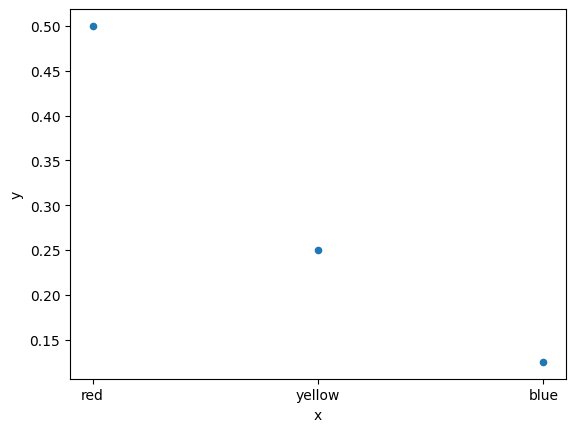

In [9]:
# 创建一个数据帧
#df = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [3, 4, 5, 6]})

# 绘制散点图
df_test.plot(kind='scatter', x='x', y='y')
plt.show()

In [ ]:
# reference
import numpy as np

# 计算多项式拟合的系数
z = np.polyfit(df_test['x'], df_test['y'], 1)

# 求出该拟合曲线
p = np.poly1d(z)

# 绘制散点图和趋势线
df_test.plot(kind='scatter', x='x', y='y')
plt.plot(df_test['x'], p(df_test['x']), 'r')
plt.show()


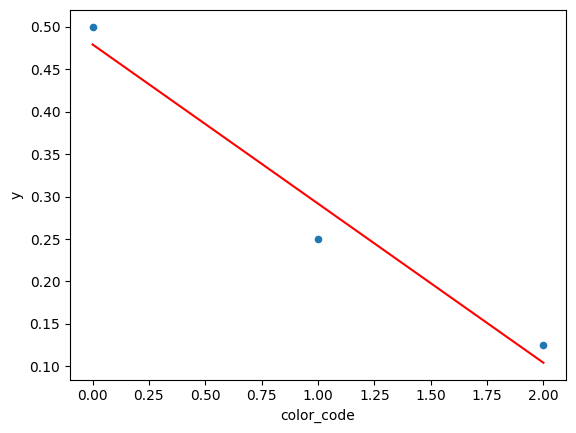

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_test = pd.DataFrame(
    {'x': ['red', 'yellow', 'blue'], 'y': [0.5, 0.25, 0.125]})

# 將顏色映射為數值型
color_mapping = {'red': 0, 'yellow': 1, 'blue': 2}
df_test['color_code'] = df_test['x'].map(color_mapping)

# 繪製散點圖
df_test.plot(kind='scatter', x='color_code', y='y')

# 進行多項式擬合
z = np.polyfit(df_test['color_code'], df_test['y'], 1)
p = np.poly1d(z)

# 繪製擬合曲線
plt.plot(df_test['color_code'], p(df_test['color_code']), 'r')


### --------------------- test End -------------------

In [ ]:
# Add trendline
# Fit a first-degree polynomial (linear regression)
z = np.polyfit(df_grouped.index, df_grouped.values, 1)
p = np.poly1d(z)
plt.plot(df_grouped.index, p(df_grouped.index), 'r--', label='Trendline')

In [52]:
# reference
import numpy as np

# 计算多项式拟合的系数
#z = np.polyfit(df_1['x'], df_1['y'], 1)
z = np.polyfit(df_1.index, df_1.values,1)

# 求出该拟合曲线
p = np.poly1d(z)

# 绘制散点图和趋势线
#df_1.plot(kind='scatter', x='x', y='y')
#plt.plot(df_1['x'], p(df_1['x']), 'r')
plt.plot(df_1.index, p(df_1.index), 'r--', label='Trendline')
plt.show()

ValueError: Polynomial must be 1d only.

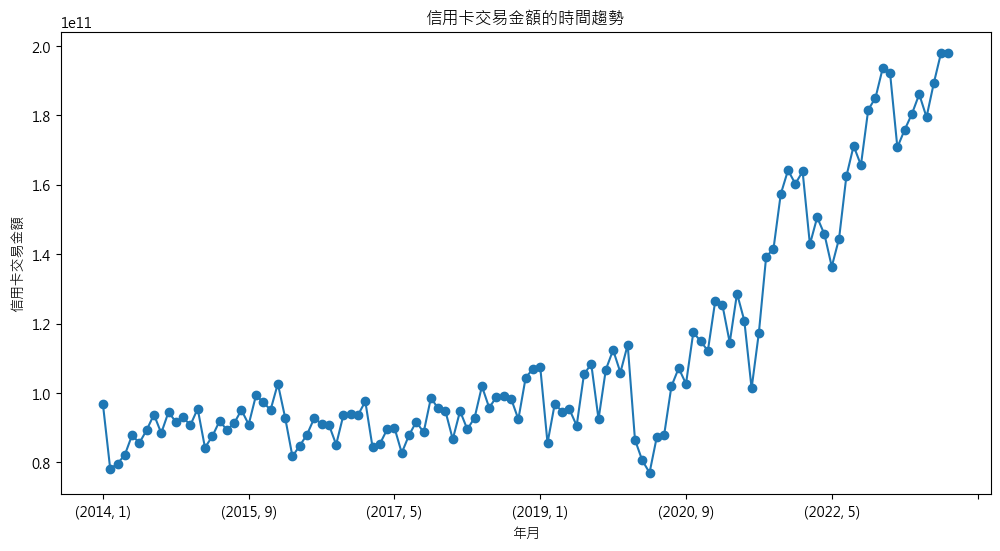

In [19]:
plt.figure(figsize=(12, 6))
df_a.groupby(['年', '月'])['信用卡交易金額[新台幣]'].sum().plot(marker='o')
plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年月')
plt.ylabel('信用卡交易金額')
plt.show()


#df_b['信用卡交易金額[新台幣]']


In [ ]:
#reference
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# 創建一個範例 DataFrame
data = {'年月': ['2021-01', '2021-02', '2021-03', '2022-04', '2022-05'],
        '人數': [10, 12, 15, 18, 20]}
df = pd.DataFrame(data)

# 將 '年月' 轉換為 datetime 類型
df['年月'] = pd.to_datetime(df['年月'])

# 提取 x 和 y 的數據
x = df['年月']
y = df['人數']

# 使用 linregress 進行線性回歸
slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(x)), y)

# 計算預測值
y_pred = intercept + slope * np.arange(len(x))

# 計算 R 平方值
r_squared = r_value**2

# 打印線性趨勢線的方程式和 R 平方值
print(f'線性趨勢線方程式: y = {intercept:.2f} + {slope:.2f} * x')
print(f'R 平方值: {r_squared:.2f}')

# 繪製原始數據和線性趨勢線
plt.scatter(x, y, label='原始數據')
plt.plot(x, y_pred, color='red', label='線性趨勢線')
plt.xlabel('年月')
plt.ylabel('人數')
plt.legend()
plt.show()

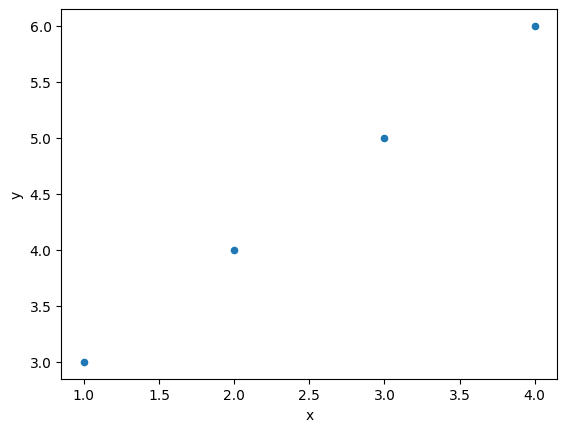

In [28]:
# reference
import pandas as pd
import matplotlib.pyplot as plt


# 创建一个数据帧
df = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [3, 4, 5, 6]})

# 绘制散点图
df.plot(kind='scatter', x='x', y='y')
plt.show()

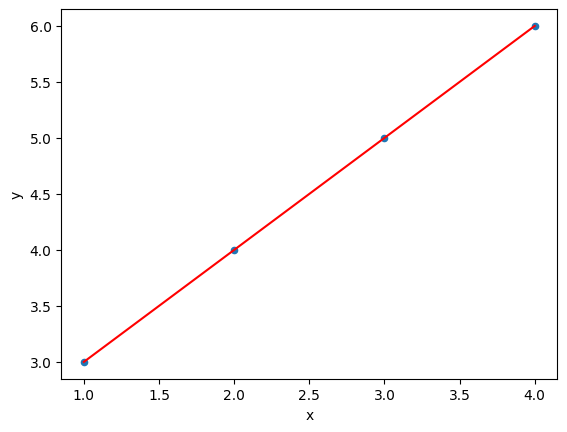

In [29]:
# reference
import numpy as np

# 计算多项式拟合的系数
z = np.polyfit(df['x'], df['y'], 1)

# 求出该拟合曲线
p = np.poly1d(z)

# 绘制散点图和趋势线
df.plot(kind='scatter', x='x', y='y')
plt.plot(df['x'], p(df['x']), 'r')
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++  END  +++++++++++++++++++++++++++++++++++++

In [ ]:
grouped_data = df_a.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns='產業別', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

產業別        年齡層     住  文教康樂    百貨     行     衣     食
0    20(含)-25歲  2198  1968  1260   592  1805   444
1    25(含)-30歲  2917  2320  1571   735  2114   578
2    30(含)-35歲  3468  2672  1733   845  2232   688
3    35(含)-40歲  3672  3021  1807   939  2267   768
4    40(含)-45歲  4009  3636  1830  1024  2417   837
5    45(含)-50歲  4496  4670  1974  1095  2704   958
6    50(含)-55歲  4828  5522  2141  1144  3055  1081
7    55(含)-60歲  5173  6013  2203  1175  3394  1195
8    60(含)-65歲  5407  6713  2211  1185  3574  1268
9    65(含)-70歲  5278  7247  2055  1149  3607  1263
10   70(含)-75歲  4985  7490  1941  1163  3782  1284
11   75(含)-80歲  5148  8289  2050  1158  3952  1314
12    80(含)歲以上  5935  7693  2232  1329  4201  1464
13       未滿20歲  2719  1939  1424   569  1591   367


In [ ]:
grouped_data = df_a.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table = grouped_data.pivot_table(index='年齡層', columns=['產業別'], values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table = pivot_table.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table.reset_index(inplace=True)

# 顯示結果
print(pivot_table)

產業別        年齡層     住  文教康樂    百貨     行     衣     食
0    20(含)-25歲  2198  1968  1260   592  1805   444
1    25(含)-30歲  2917  2320  1571   735  2114   578
2    30(含)-35歲  3468  2672  1733   845  2232   688
3    35(含)-40歲  3672  3021  1807   939  2267   768
4    40(含)-45歲  4009  3636  1830  1024  2417   837
5    45(含)-50歲  4496  4670  1974  1095  2704   958
6    50(含)-55歲  4828  5522  2141  1144  3055  1081
7    55(含)-60歲  5173  6013  2203  1175  3394  1195
8    60(含)-65歲  5407  6713  2211  1185  3574  1268
9    65(含)-70歲  5278  7247  2055  1149  3607  1263
10   70(含)-75歲  4985  7490  1941  1163  3782  1284
11   75(含)-80歲  5148  8289  2050  1158  3952  1314
12    80(含)歲以上  5935  7693  2232  1329  4201  1464
13       未滿20歲  2719  1939  1424   569  1591   367


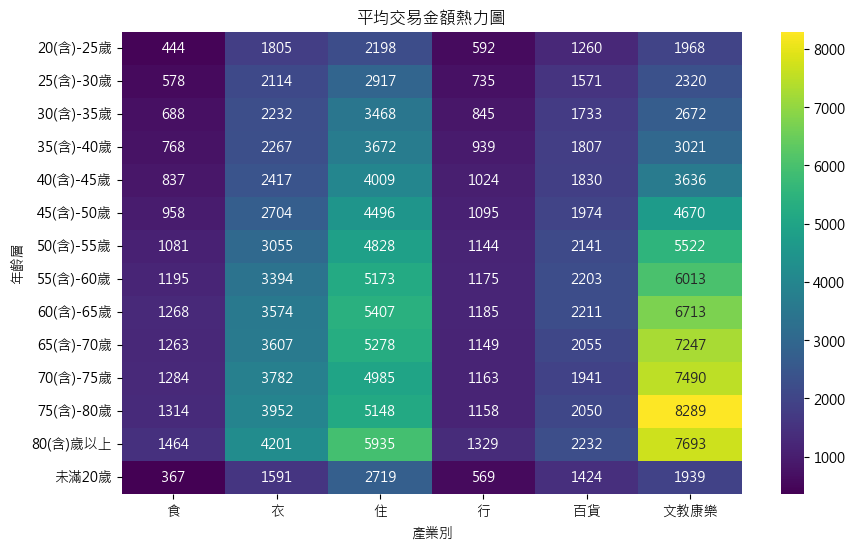

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層')[['食', '衣', '住', '行', '百貨', '文教康樂']], cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

              信用卡交易筆數  信用卡交易金額[新台幣]
信用卡交易筆數       1.00000       0.68617
信用卡交易金額[新台幣]  0.68617       1.00000


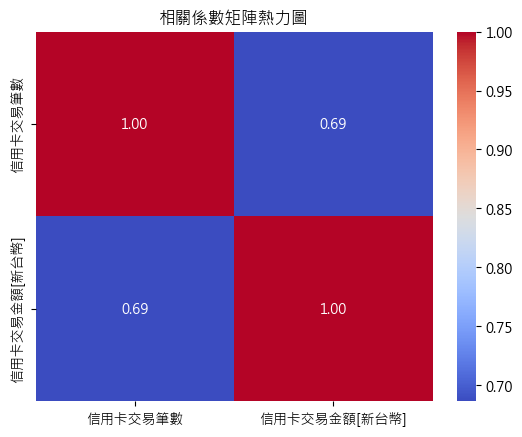

In [ ]:
matplotlib.rc('font', family='Microsoft JhengHei')
selected_columns = ['信用卡交易筆數', '信用卡交易金額[新台幣]']
selected_data = df[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('相關係數矩陣熱力圖')
plt.show()

In [ ]:
print(df['平均交易金額'])
print(df_a['平均交易金額'])


In [ ]:
selected_columns = ['年齡層', '產業別', '平均交易金額']

# 過濾原始資料
selected_data = df_a[selected_columns]

# 使用 pivot_table 將資料進行重塑，並重設索引
pivot_table = selected_data.pivot_table(index='年齡層', columns='產業別', values='平均交易金額', aggfunc='mean').reset_index()

# 顯示結果
print(pivot_table)

產業別        年齡層            住         文教康樂           百貨            行  \
0    20(含)-25歲  3425.990836          inf  1487.479076         -inf   
1    25(含)-30歲  4064.485769  2679.642317  1714.948690   911.779997   
2    30(含)-35歲  4495.904510  2841.779901  1769.267354  1026.702346   
3    35(含)-40歲  4614.847032  3031.540358  1818.848632  1117.002907   
4    40(含)-45歲  5024.088543  3554.514024  1929.873755  1179.685796   
5    45(含)-50歲          inf         -inf  2037.696628  1228.082373   
6    50(含)-55歲  5657.043348  4751.527105  2211.374190  1256.444428   
7    55(含)-60歲  5923.544378  5237.076450  2364.040104  1284.620090   
8    60(含)-65歲  6052.727157         -inf  2365.413728          inf   
9    65(含)-70歲  5920.390521          inf         -inf  1152.942616   
10   70(含)-75歲  5791.458013  6497.137243  2295.392207  1137.512198   
11   75(含)-80歲         -inf         -inf         -inf          inf   
12    80(含)歲以上  7519.913414         -inf          inf          inf   
13       未滿20歲      

In [ ]:

plt.rcParams['font.family'] = 'Microsoft JhengHei'

# 選擇需要的資料列
selected_columns = ['年齡層', '產業別', '平均交易金額']

# 過濾原始資料
selected_data = pivot_table[selected_columns]

# 使用熱力圖呈現平均交易金額
plt.figure(figsize=(12, 8))
correlation_matrix = selected_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('熱力圖 - 年齡和產業別的平均交易金額')
plt.xlabel('產業別')
plt.ylabel('年齡層')
plt.show()

In [ ]:
matplotlib.rc('font', family='Microsoft JhengHei')
selected_columns = [df['年齡層'], df['平均交易金額']]
selected_data = df[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('相關係數矩陣熱力圖')
plt.show()

KeyError: "None of [Index([('未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', ...), (2038.276595744681, 2335.8719503596108, 2550.3286754287387, 2645.073276836158, 2769.0052065592913, 2942.9148605178507, 3334.210874806578, 3940.1036468330135, 4286.992319708409, 4426.653902367729, 4437.32101910828, 5078.527777777777, 3109.7719298245615, 4273.387179487179, 1859.4518828451883, 2217.497101178231, 2420.028453816711, 2429.4802440951794, 2494.0135151393624, 2641.95495291561, 3083.8286768881317, 3585.214221824687, 3895.1167322130855, 4241.911880409127, 3667.2938311688313, 3825.0833333333335, 4241.80701754386, 3358.3534136546186, 1815.8070175438597, 2073.9177440206854, 2338.1428657218353, 2387.344505293903, 2494.706126760563, 2698.8987456302693, 3147.8093857388317, 3626.47157161515, 4099.06716534206, 4009.086926286509, 3596.399416909621, 3602.9468599033817, 2817.4, 3806.2663934426228, 1661.8215767634854, 2016.6733803289694, 2302.3321347464043, 2411.909319050116, 2508.2897670070474, 2648.8395805347313, 3155.2463062650327, 3660.3488050198393, 4151.508439897698, 4025.035500747384, 4108.239416058394, 4241.021621621621, 3235.0731707317073, 4114.367924528302, 1728.2090163934427, 1995.7240324307786, 2335.5981942641333, 2370.1632616868837, 2538.7385749896134, 2685.230212836714, 3178.125245553491, 3712.4978389344624, 4108.365983674829, 4291.344424131627, 3694.1473214285716, 4236.60294117647, 5015.096153846154, 4057.975265017668, 1885.0916666666667, 1903.2935507783543, 2170.305874174487, 2265.5930385288966, 2478.184228462377, 2658.2467236018733, 2975.4017102565385, 3484.545286351022, 3994.3587896253603, 4318.375191424196, 3485.3601147776185, 4194.0918918918915, 5612.984615384616, 3560.4744525547444, 1635.5283687943263, 1856.9714782105111, 2065.0329941250525, 2146.33201000834, 2291.828932367894, 2435.118679086707, 2796.3786799300983, 3162.5158024882157, 3485.949732302201, 3572.004099760847, 3443.921151439299, 3224.675105485232, 6125.258620689655, 3026.2111436950145, 1712.4816053511706, 1870.5117868600921, ...)], dtype='object')] are in the [columns]"

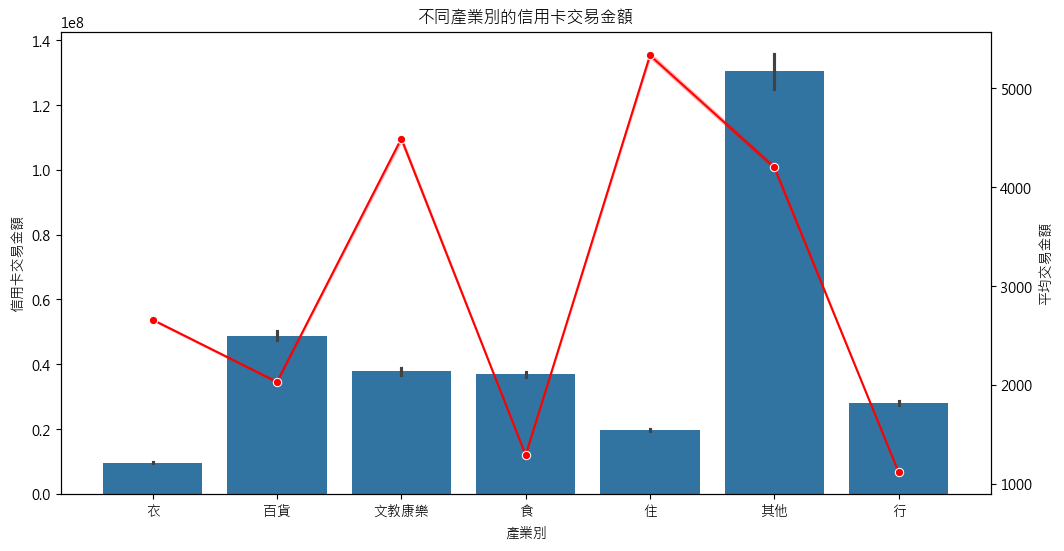

In [ ]:
#依產業別分析
matplotlib.rc('font', family='Microsoft JhengHei')
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21064\3117670455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['平均交易金額'] = df_a['信用卡交易金額[新台幣]'] / df_a['信用卡交易筆數']


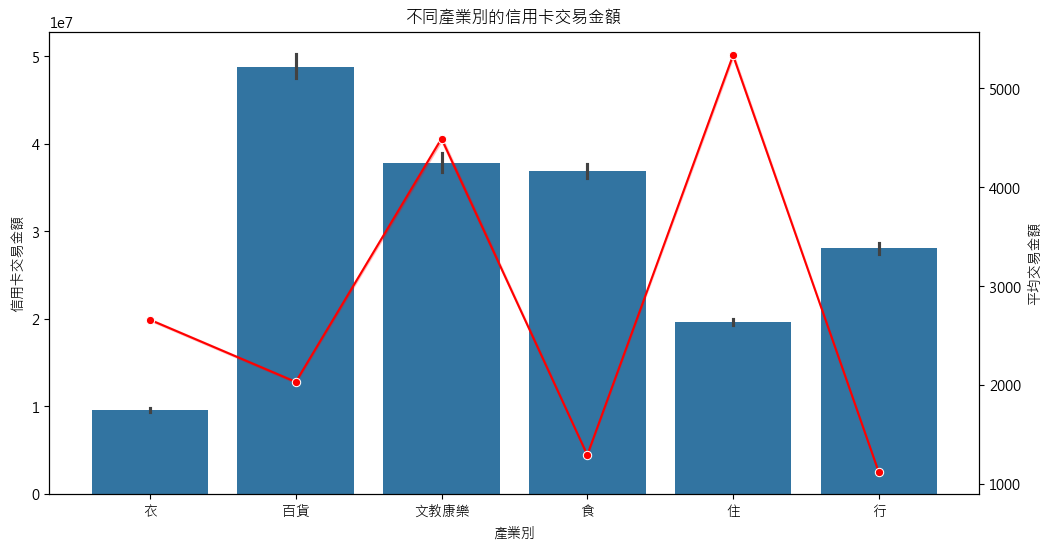

In [ ]:
#依產業別分析(排除其他)
df_a['平均交易金額'] = df_a['信用卡交易金額[新台幣]'] / df_a['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df_a)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df_a, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

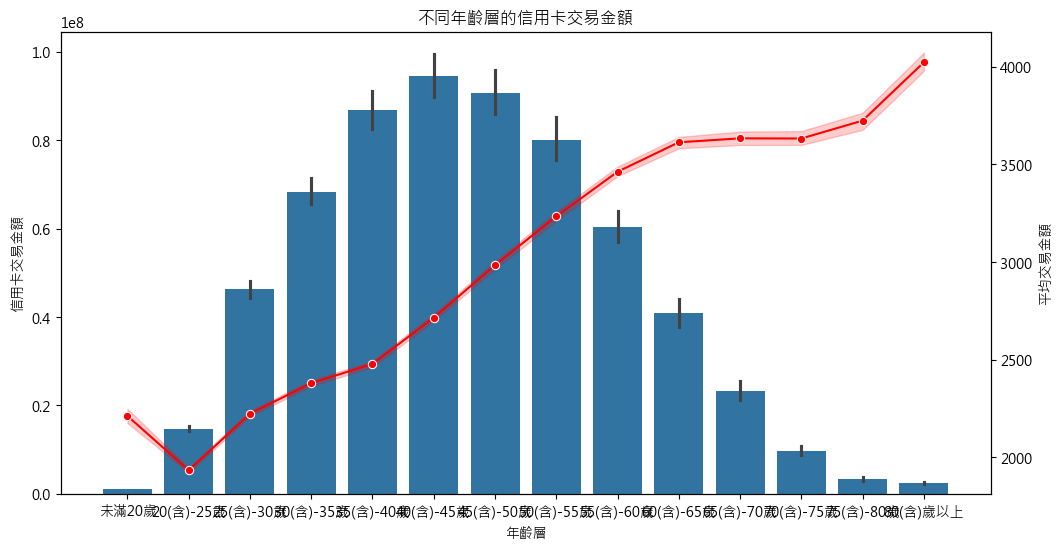

In [ ]:
#依年齡層分析
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_21064\622509789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['平均交易金額'] = df_a['信用卡交易金額[新台幣]'] / df_a['信用卡交易筆數']


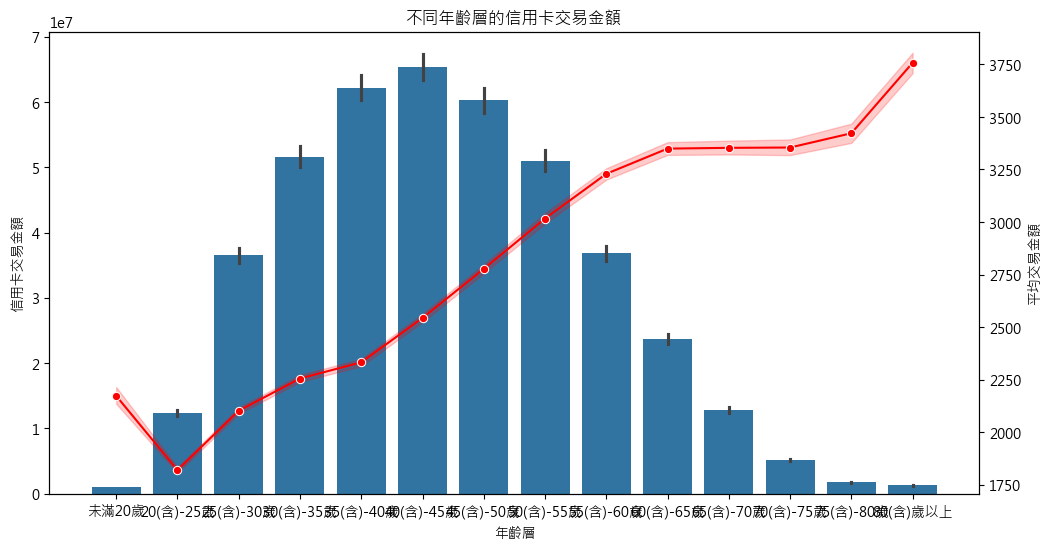

In [ ]:
#依年齡層分析(排除其他)
df_a['平均交易金額'] = df_a['信用卡交易金額[新台幣]'] / df_a['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df_a)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df_a, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


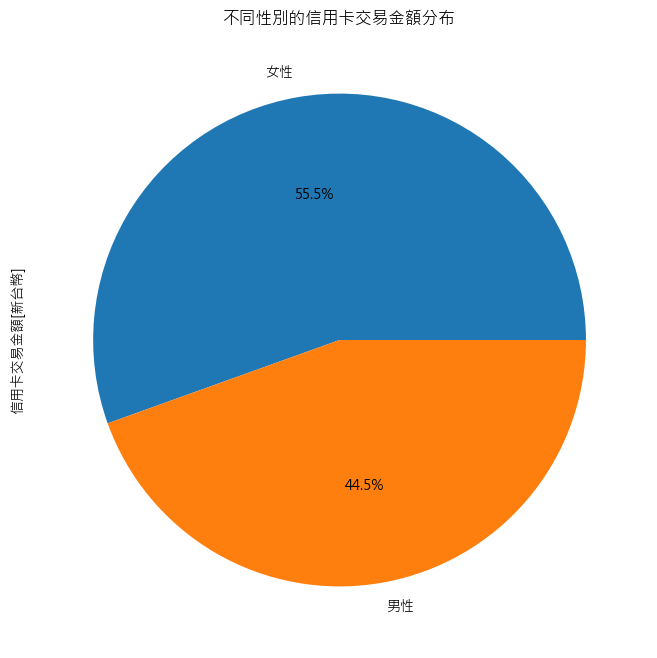

In [ ]:
#依性別分析
plt.figure(figsize=(8, 8))
df.groupby('性別')['信用卡交易金額[新台幣]'].sum().plot.pie(autopct='%1.1f%%')
plt.title('不同性別的信用卡交易金額分布')
plt.show()

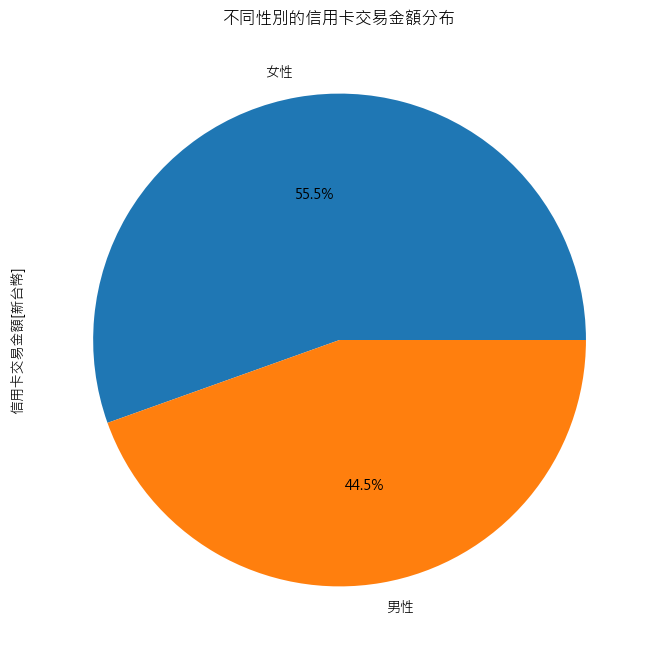

In [ ]:
#依性別分析(排附其他)
plt.figure(figsize=(8, 8))
df_a.groupby('性別')['信用卡交易金額[新台幣]'].sum().plot.pie(autopct='%1.1f%%')
plt.title('不同性別的信用卡交易金額分布')
plt.show()

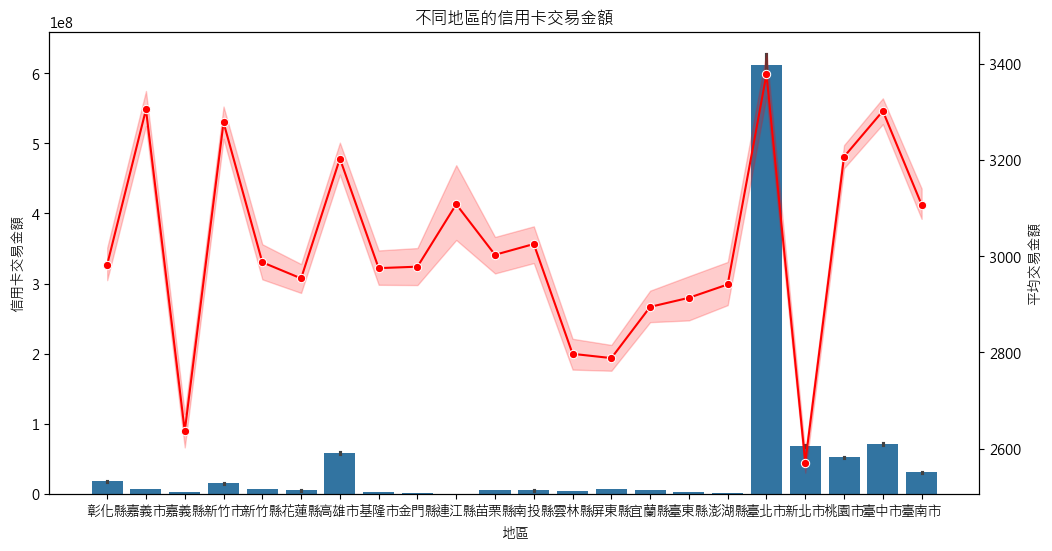

In [ ]:
#依區域進行分析
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

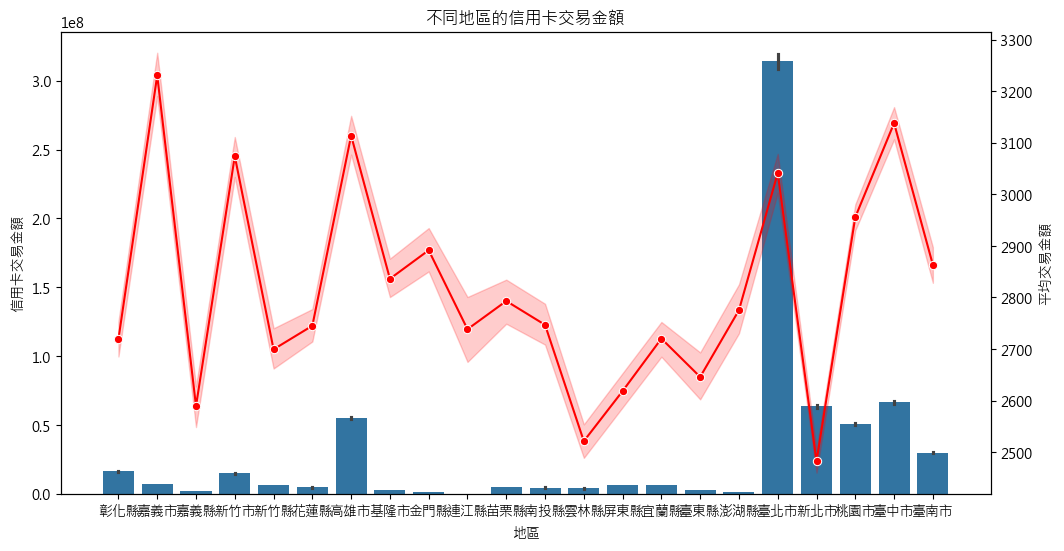

In [ ]:
#依區域進行分析(排除其他)
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df_a)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df_a, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

In [ ]:
#截取六都資料
df_area6 = pd.read_csv('./six_cities.csv')
x = df_area6['信用卡交易金額[新台幣]'].sum (0)
y = df['信用卡交易金額[新台幣]'].sum(0)
print(f'六都佔總簽帳金額百分比: {x/y:.2%}')
print(df_area6)

六都佔總簽帳金額百分比: 92.29%
           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       2014  1  臺北市   食  女性      未滿20歲     2819       2615745
1       2014  1  臺北市   食  女性  20(含)-25歲    66270      66794381
2       2014  1  臺北市   食  女性  25(含)-30歲   227091     263753101
3       2014  1  臺北市   食  女性  30(含)-35歲   396113     490378285
4       2014  1  臺北市   食  女性  35(含)-40歲   498370     618092602
...      ... ..  ...  ..  ..        ...      ...           ...
137587  2023  9  高雄市   行  男性  60(含)-65歲    50439     109126842
137588  2023  9  高雄市   行  男性  65(含)-70歲    31387      57677827
137589  2023  9  高雄市   行  男性  70(含)-75歲    16872      32315853
137590  2023  9  高雄市   行  男性  75(含)-80歲     4559      10076219
137591  2023  9  高雄市   行  男性   80(含)歲以上     1752       3201237

[137592 rows x 8 columns]


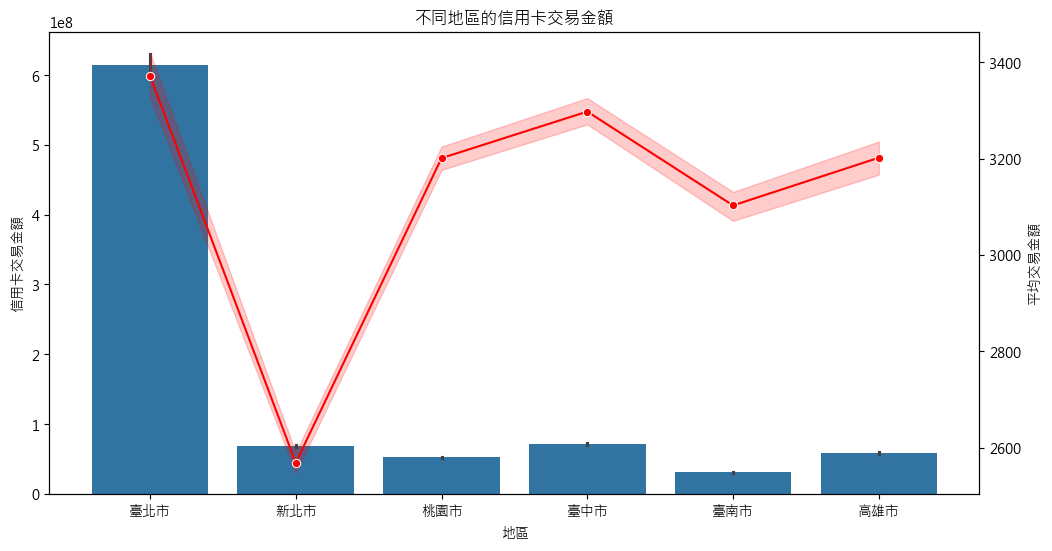

In [ ]:
#六都依區域進行分析
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df_area6)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df_area6, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

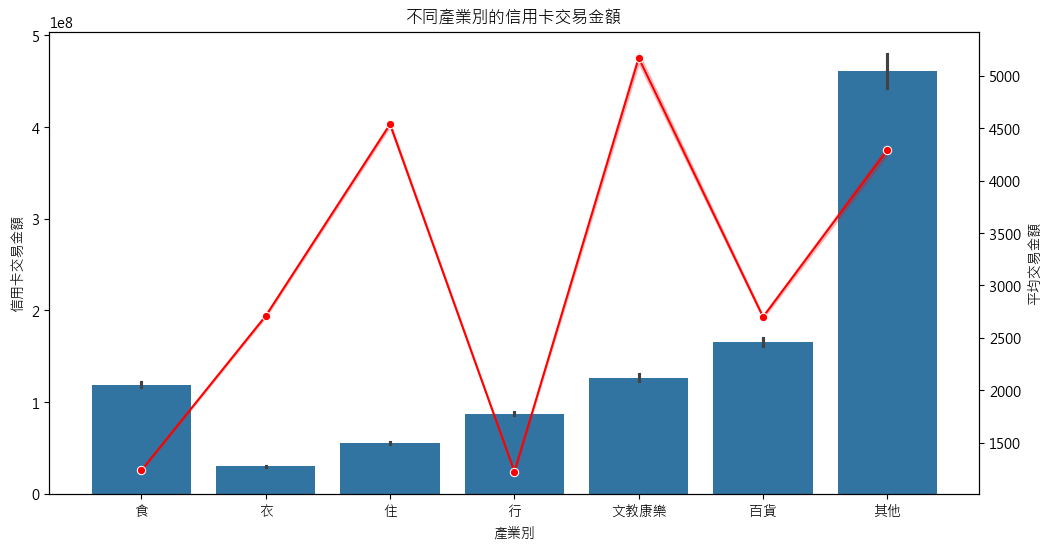

In [ ]:
#六都依產業別分析
df_area6['平均交易金額'] = df_area6['信用卡交易金額[新台幣]'] / df_area6['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df_area6)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df_area6, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

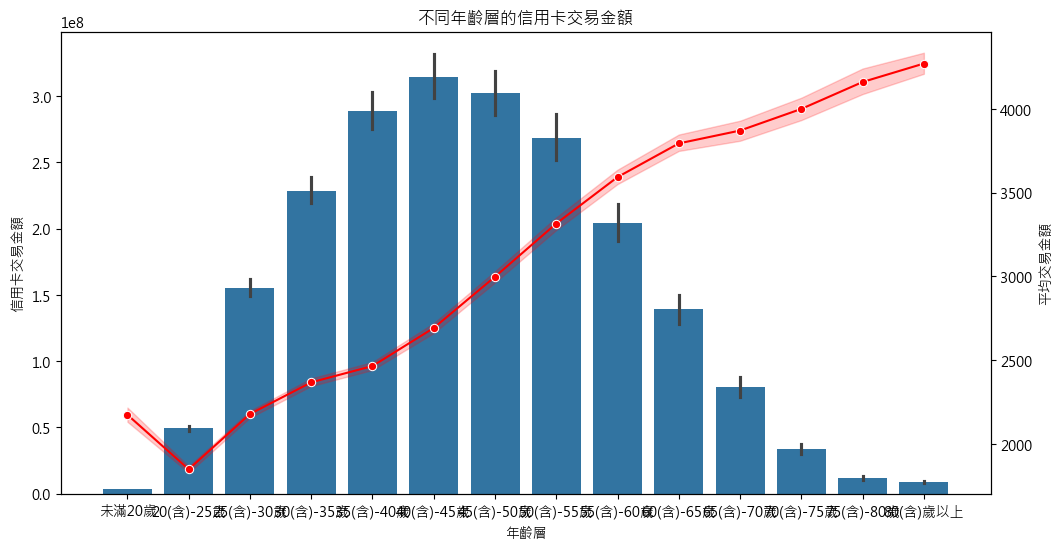

In [ ]:
#六都依年齡層分析
df_area6['平均交易金額'] = df_area6['信用卡交易金額[新台幣]'] / df_area6['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df_area6)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df_area6, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


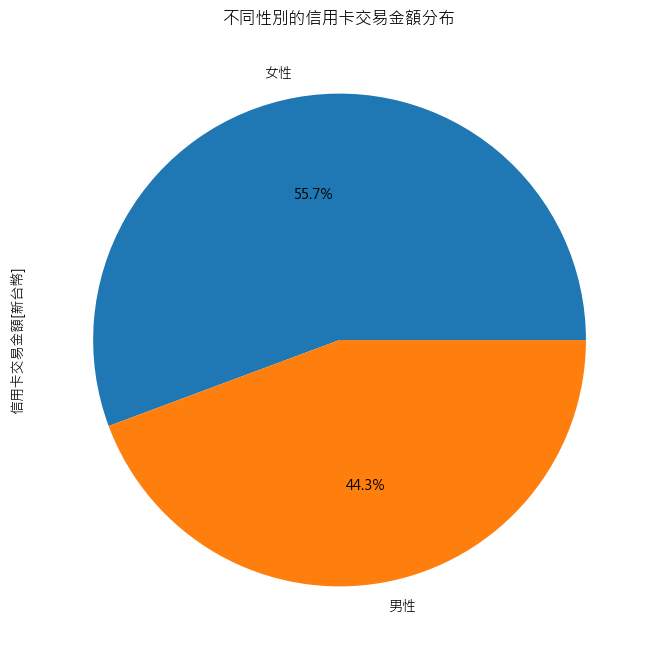

In [ ]:
#六都依性別分析
plt.figure(figsize=(8, 8))
df_area6.groupby('性別')['信用卡交易金額[新台幣]'].sum().plot.pie(autopct='%1.1f%%')
plt.title('不同性別的信用卡交易金額分布')
plt.show()

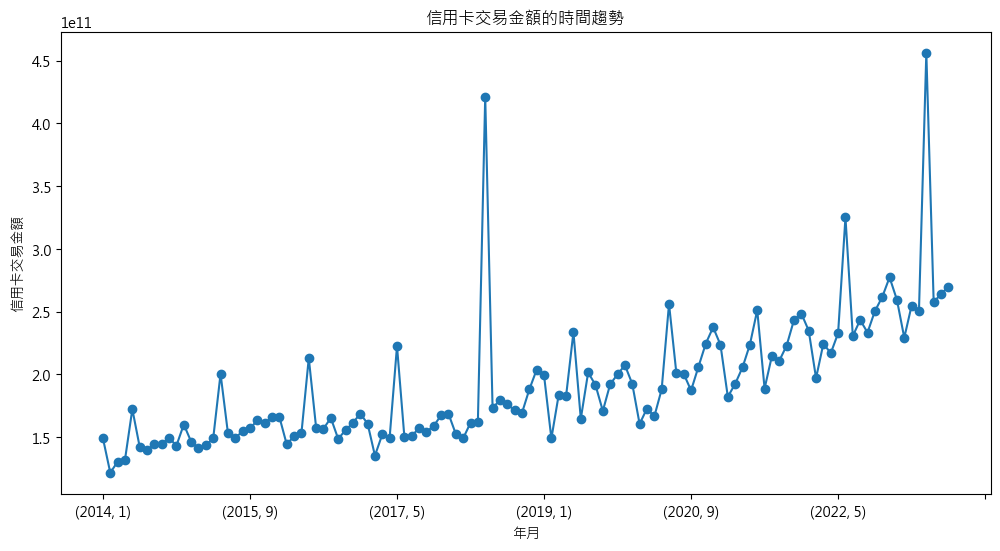

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby(['年', '月'])['信用卡交易金額[新台幣]'].sum().plot(marker='o')
plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年月')
plt.ylabel('信用卡交易金額')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\2135203272.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


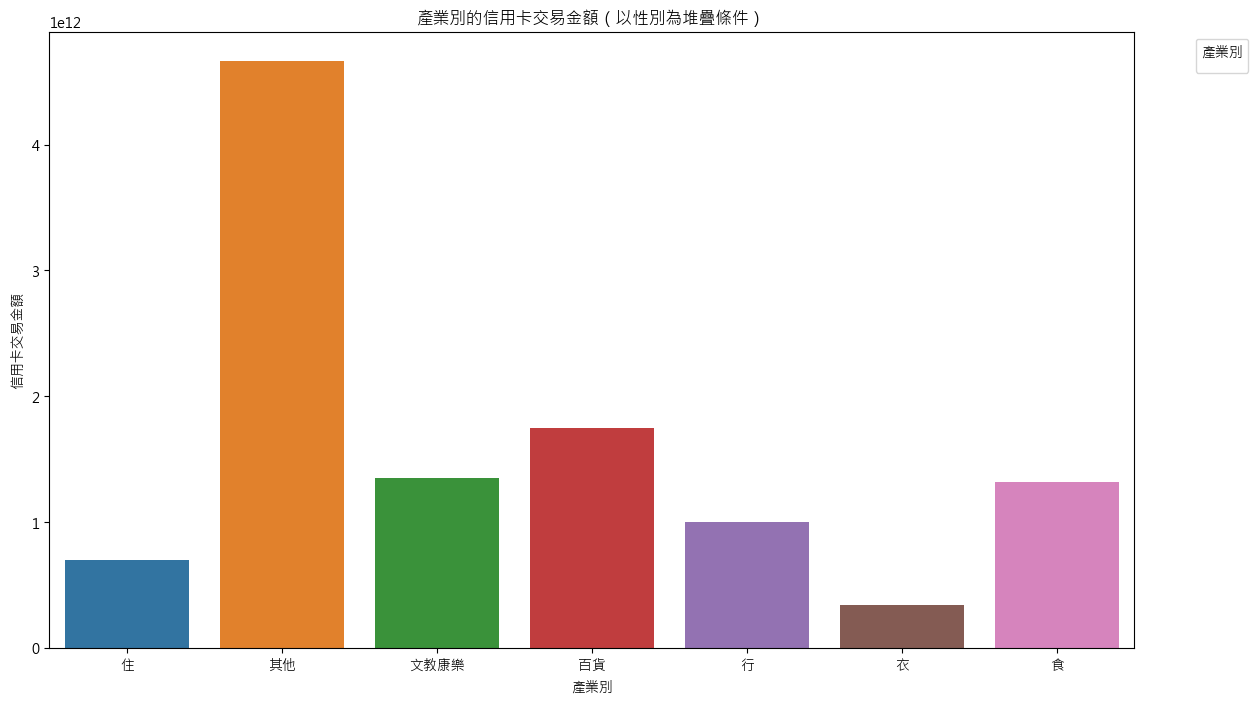

In [ ]:
grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
plt.title('產業別的信用卡交易金額（以性別為堆疊條件）')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\4066691068.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None)


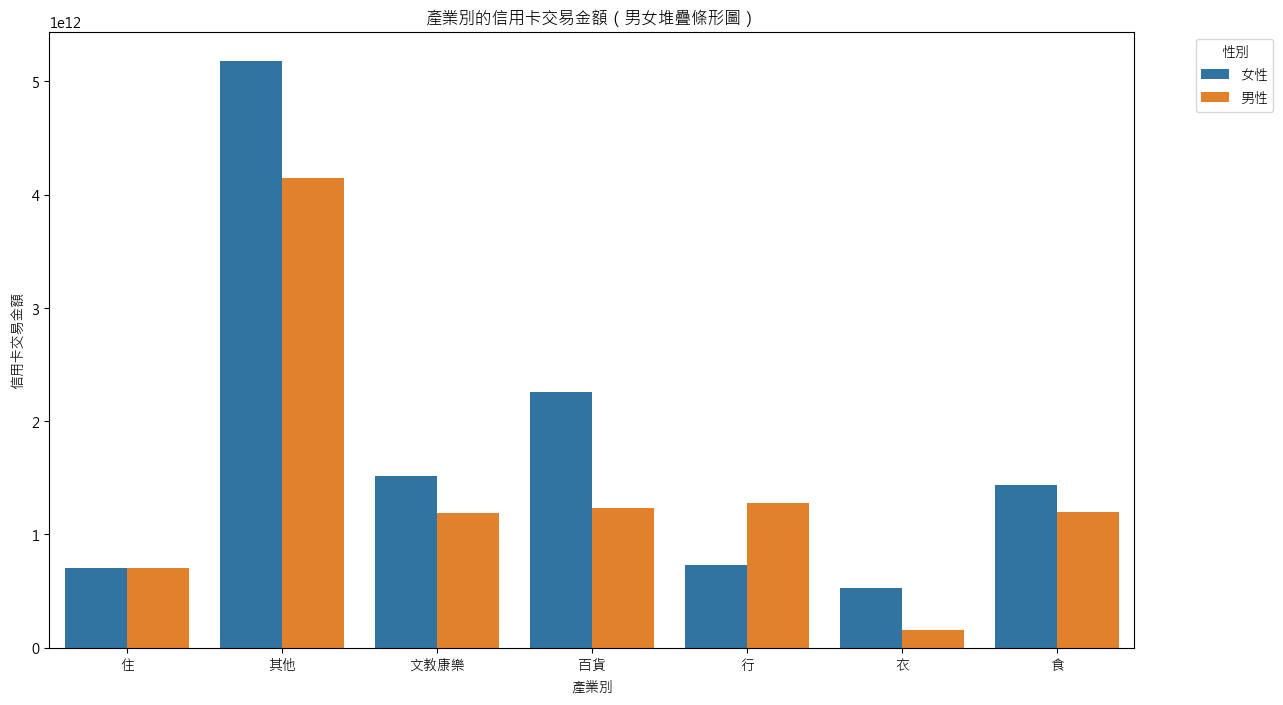

In [ ]:

grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 使用堆疊圖，x='產業別'，y='信用卡交易金額[新台幣]'，hue='性別'
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None)
plt.title('產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\2675403776.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None, palette={'男性': 'blue', '女性': 'orange'})


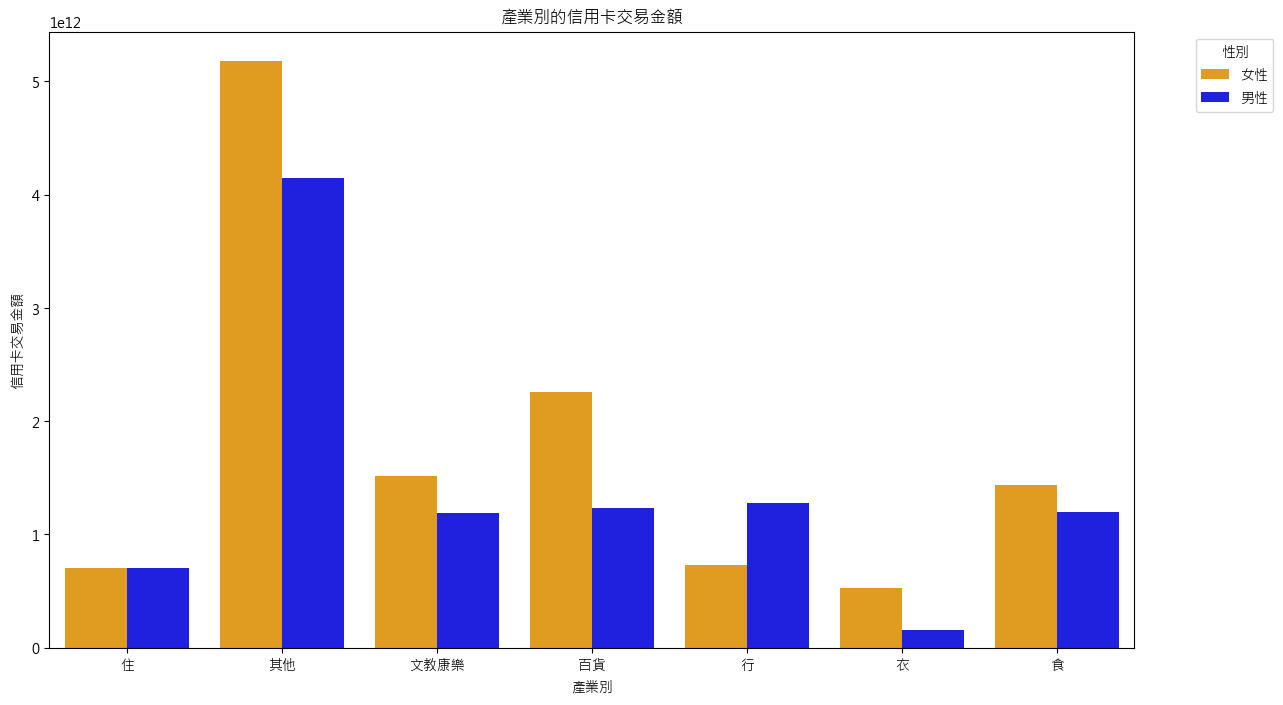

In [ ]:
grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖，使用不同顏色區分男女
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None, palette={'男性': 'blue', '女性': 'orange'})
plt.title('產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\3913188557.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=filtered_data, ci=None)


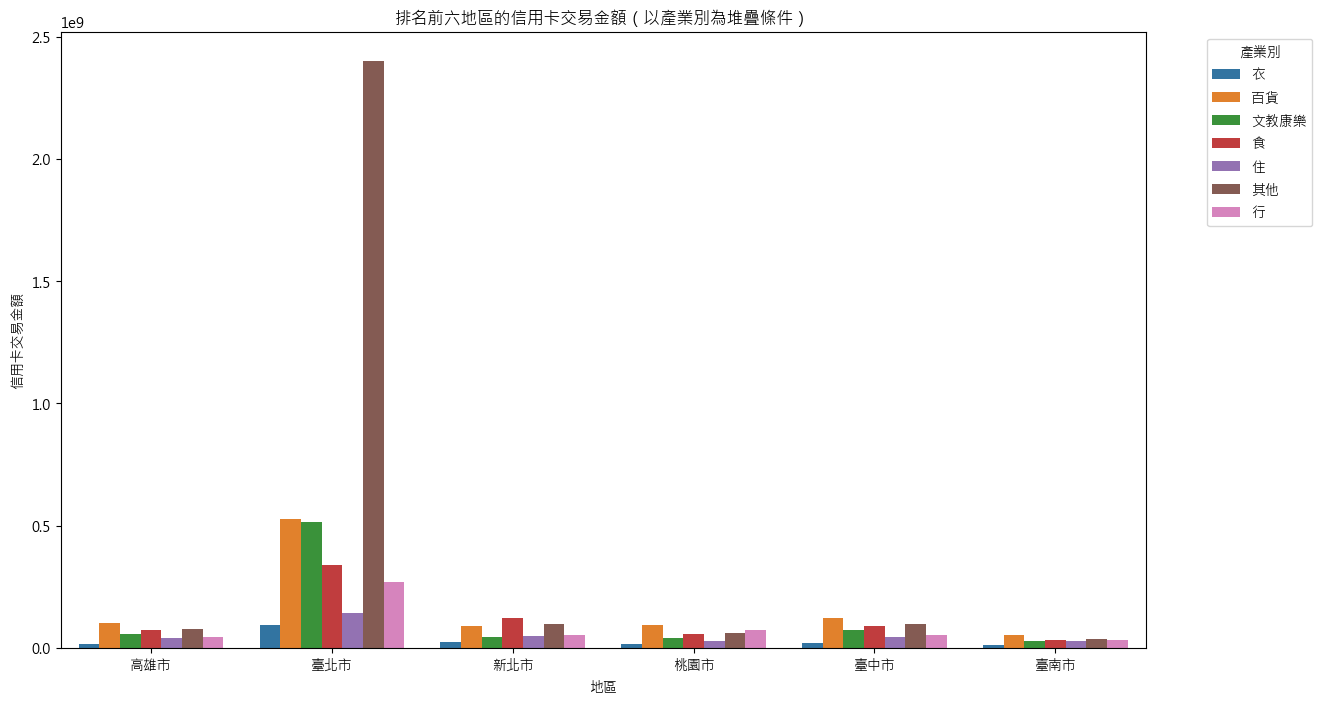

In [ ]:
region_total = df.groupby('地區')['信用卡交易金額[新台幣]'].sum().reset_index()

# 選擇排名前六的地區
top_regions = region_total.nlargest(6, '信用卡交易金額[新台幣]')['地區']

# 過濾原始資料，只保留排名前六的地區的資料
filtered_data = df[df['地區'].isin(top_regions)]

# 繪製堆疊圖，x='地區'，y='信用卡交易金額[新台幣]'，hue='產業別'，以性別堆疊
plt.figure(figsize=(14, 8))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=filtered_data, ci=None)
plt.title('排名前六地區的信用卡交易金額（以產業別為堆疊條件）')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
grouped_data = df.groupby(['性別', '地區', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖
plt.figure(figsize=(14, 8))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
plt.title('不同地區、產業別的信用卡交易金額（以性別為堆疊條件）')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

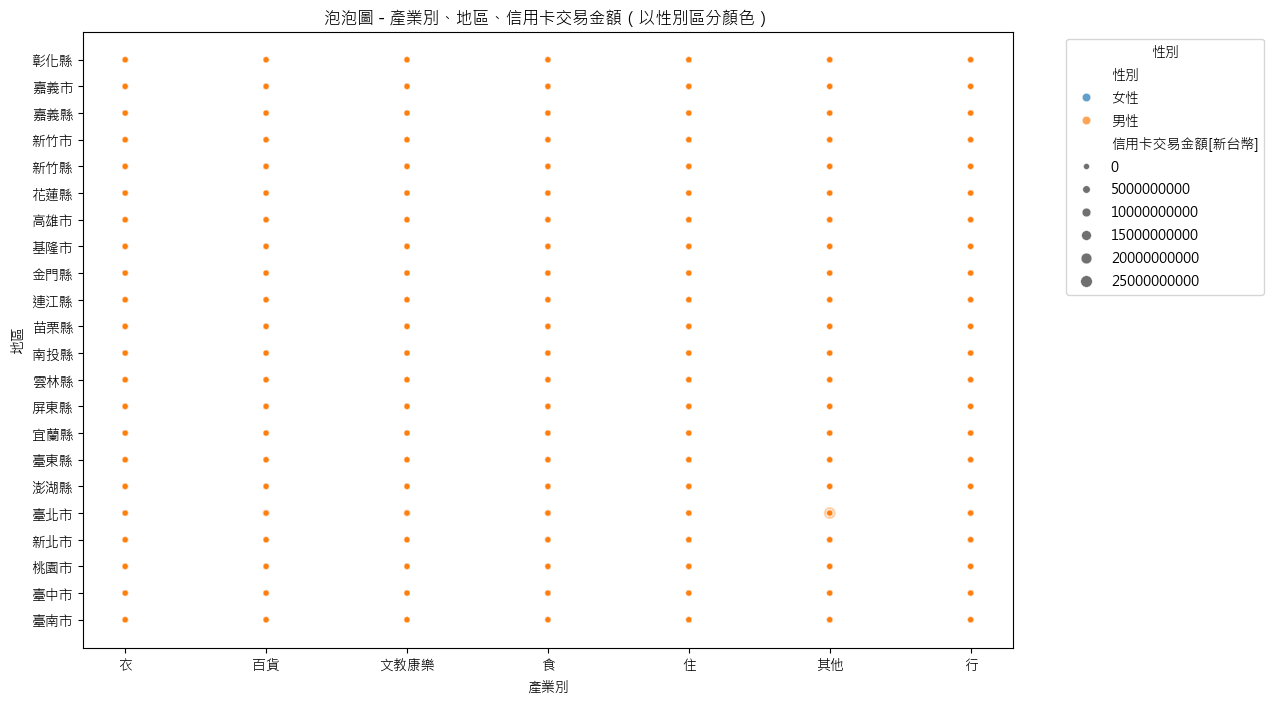

In [ ]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
selected_columns = ['產業別', '地區', '信用卡交易金額[新台幣]', '性別']
selected_data = df[selected_columns]
plt.figure(figsize=(12, 8))
sns.scatterplot(x='產業別', y='地區', size='信用卡交易金額[新台幣]', hue='性別', data=selected_data, alpha=0.7)
plt.title('泡泡圖 - 產業別、地區、信用卡交易金額（以性別區分顏色）')
plt.xlabel('產業別')
plt.ylabel('地區')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

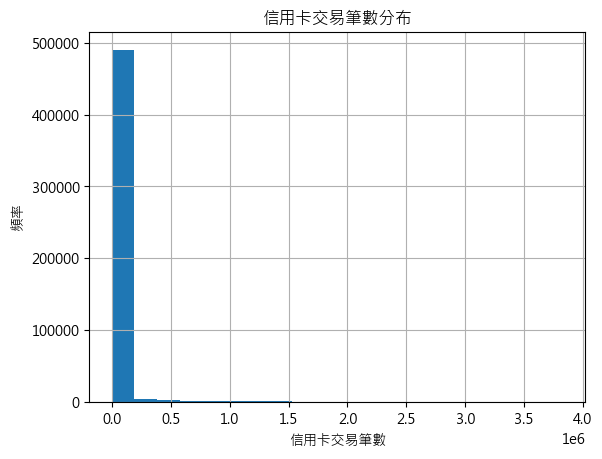

In [ ]:
df['信用卡交易筆數'].hist(bins=20)
plt.title('信用卡交易筆數分布')
plt.xlabel('信用卡交易筆數')
plt.ylabel('頻率')
plt.show()

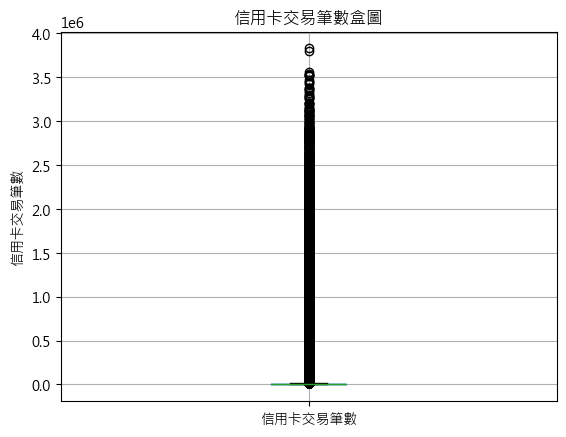

In [ ]:
df.boxplot(column='信用卡交易筆數')
plt.title('信用卡交易筆數盒圖')
plt.ylabel('信用卡交易筆數')
plt.show()